
#**Happy or Not? Emotion Analysis of “Friends” based on Language Models**

# Libraries and Preprocessing Dataframe

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.5 MB/s eta 0:00:00


In [ ]:
import json
import pandas as pd
from google.colab import drive
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
file_path = '/content/drive/MyDrive/Text_mining/emotion-detection-trn.json'
file_1 = pd.read_json(file_path)
file_path = '/content/drive/MyDrive/Text_mining/emotion-detection-dev.json'
file_2 = pd.read_json(file_path)
file_path = '/content/drive/MyDrive/Text_mining/emotion-detection-tst.json'
file_3 = pd.read_json(file_path)

In [ ]:
def create_dataframe(data):
    season_ids = []
    episode_ids = []
    scene_ids = []
    utterance_ids = []
    speakers = []
    transcripts = []
    tokens = []
    emotions = []

    for episode in data['episodes']:
        for scene in episode['scenes']:
            for utterance in scene['utterances']:
                season_ids.append(data['season_id'])
                episode_ids.append(episode['episode_id'])
                scene_ids.append(scene['scene_id'])
                utterance_ids.append(utterance['utterance_id'])
                speakers.append(utterance['speakers'][0])
                transcripts.append(utterance['transcript'])
                tokens.append(utterance['tokens'])
                emotions.append(utterance['emotion'])

    df = pd.DataFrame({
        'season_id': season_ids,
        'episode_id': episode_ids,
        'scene_id': scene_ids,
        'utterance_id': utterance_ids,
        'speakers': speakers,
        'transcript': transcripts,
        'tokens': tokens,
        'emotion': emotions
    })

    return df

In [ ]:
#CREATE FIRTS DATASET
file_1 = create_dataframe(file_1)
file_2 = create_dataframe(file_2)
file_3 = create_dataframe(file_3)

list_of_dataframe = [file_1, file_2, file_3]
df = pd.concat(list_of_dataframe, ignore_index=True)
df

season_id episode_id  \
0      0     trn
1     trn
2     trn
3     trn
4     ...    s01_e02   
1      0     trn
1     trn
2     trn
3     trn
4     ...    s01_e02   
2      0     trn
1     trn
2     trn
3     trn
4     ...    s01_e02   
3      0     trn
1     trn
2     trn
3     trn
4     ...    s01_e02   
4      0     trn
1     trn
2     trn
3     trn
4     ...    s01_e02   
...                                                  ...        ...   
12601  0    tst
1    tst
2    tst
3    tst
4    tst
5...    s04_e20   
12602  0    tst
1    tst
2    tst
3    tst
4    tst
5...    s04_e20   
12603  0    tst
1    tst
2    tst
3    tst
4    tst
5...    s04_e20   
12604  0    tst
1    tst
2    tst
3    tst
4    tst
5...    s04_e20   
12605  0    tst
1    tst
2    tst
3    tst
4    tst
5...    s04_e20   

          scene_id      utterance_id        speakers  \
0      s01_e02_c01  s01_e02_c01_u001   Monica Geller   
1      s01_e02_c01  s01_e02_c01_u002  Joey Tribbiani   
2      s01_e02_c01  s01_e02_c01_u003   Phoebe Buffay   
3      s01_e02_c01  s01_e02_c01_u004    Rachel Green   
4      s01_e02_c01  s01_e02_c01_u005   Monica Geller   
...            ...               ...             ...   
12601  s04_e20_c11  s04_e20_c11_u021   Phoebe Buffay   
12602  s04_e20_c11  s04_e20_c11_u022  Joey Tribbiani   
12603  s04_e20_c11  s04_e20_c11_u023   Monica Geller   
12604  s04_e20_c11  s04_e20_c11_u024  Joey Tribbiani   
12605  s04_e20_c11  s04_e20_c11_u025   Chandler Bing   

                                              transcript  \
0      What you guys don't understand is, for us, kis...   
1                          Yeah, right!.......Y'serious?   
2                                              Oh, yeah!   
3      Everything you need to know is in that first k...   
4                                            Absolutely.   
...                                                  ...   
12601                                      What is that?   
12602  Oh, they gave it to me at the sleep clinic, an...   
12603  Well, are you asleep right now, Joe? 'Cause I ...   
12604           I know I don't have too! It tastes good.   
12605                               Plus, you look cool.   

                                                  tokens   emotion  
0      [[What, you, guys, do, n't, understand, is, ,,...    Joyful  
1       [[Yeah, ,, right, !], [.......], [Y'serious, ?]]   Neutral  
2                                     [[Oh, ,, yeah, !]]    Joyful  
3      [[Everything, you, need, to, know, is, in, tha...  Powerful  
4                                      [[Absolutely, .]]  Powerful  
...                                                  ...       ...  
12601                              [[What, is, that, ?]]  Peaceful  
12602  [[Oh, ,, they, gave, it, to, me, at, the, slee...  Peaceful  
12603  [[Well, ,, are, you, asleep, right, now, ,, Jo...  Peaceful  
12604  [[I, know, I, do, n't, have, too, !], [It, tas...  Peaceful  
12605                    [[Plus, ,, you, look, cool, .]]    Joyful  

[12606 rows x 8 columns]

In [ ]:
#Loading two different emotion classifier
distilbert_uncased_emotion = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion", return_all_scores=True)
distilroberta_emotion_english= pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
class EmotionPredictor:
    def __init__(self, emotion_classifier):
        self.emotion_classifier = emotion_classifier

    def predict_emotions_for_dataframe(self, input_df):
        predicted_emotions = []
        max_emotion_labels = []

        for index, row in input_df.iterrows():
            transcript = row['transcript']
            predicted_emotion = self.predict_emotions(transcript)
            predicted_emotions.append(predicted_emotion)

            max_score = 0
            max_label = ''
            for predicted_emotion_entry in predicted_emotion[0]:
                if predicted_emotion_entry['score'] > max_score:
                    max_score = predicted_emotion_entry['score']
                    max_label = predicted_emotion_entry['label']
            max_emotion_labels.append(max_label)
        input_df['predicted_emotions'] = predicted_emotions
        input_df['max_emotion_label'] = max_emotion_labels

    def predict_emotions(self, transcript):
        return self.emotion_classifier(transcript)

In [ ]:
df1 = df.copy()
df2 = df.copy()

In [ ]:
## CREATE DATAFRAME FOR DIFFERENT EMOTION DETECTORS
'''
predictor = EmotionPredictor(distilbert_uncased_emotion)
predictor.predict_emotions_for_dataframe(df1)
print(df1)

predictor = EmotionPredictor(distilroberta_emotion_english)
predictor.predict_emotions_for_dataframe(df2)
print(df2)
'''

KeyboardInterrupt: ignored

In [ ]:
#UPDATE NEW DATAFRAME TO DRIVE
'''
drive_path = '/content/drive/MyDrive/Text_mining/'
#Save the DataFrame as a CSV file on Google Drive
file_name1 = 'df1_sentiment_scores.csv'
file_name2 = 'df2_sentiment_scores.csv'
df1.to_csv(drive_path + file_name1, index=False)
df2.to_csv(drive_path + file_name2, index=False)
'''

In [ ]:
# LOAD DATAFRAME
drive_path1 = '/content/drive/MyDrive/Text_mining/df1_sentiment_scores.csv'
drive_path2 = '/content/drive/MyDrive/Text_mining/df2_sentiment_scores.csv'
df1 = pd.read_csv(drive_path1)
df2 = pd.read_csv(drive_path2)

#0)  EMOTION DETECTION experiment





In [ ]:
def find_row_with_phrase(df, phrase):
    try:
        return df[df['transcript'].str.contains(phrase)].index[0]
    except IndexError:
        raise ValueError("La frase specificata non è presente nel dataframe.")

#Plotting function for DF0
def plot_emotion_histogram(df, row_index, emotion_colors):
    emotions = df.loc[row_index, 'emotion']
    x = df['emotion'].unique()
    y = [1 if e == emotions else 0 for e in x]

    colors = [emotion_colors[emotion] for emotion in x]

    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color=colors)
    plt.title('Real emotion histogram')
    plt.xlabel('Emotion')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    legend_labels = [plt.Line2D([0], [0], color=emotion_colors[label], lw=4, label=label) for label in emotion_colors.keys()]
    plt.legend(handles=legend_labels, loc='center')
    plt.show()

#Plotting function for DF1
def classifier(classifier, text, emotion_colors):
    predictions = classifier(text)
    emotion_labels = [entry['label'] for entry in predictions[0]]
    emotion_scores = [entry['score'] for entry in predictions[0]]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(emotion_labels, emotion_scores, color=[emotion_colors[label] for label in emotion_labels])
    plt.xlabel("Emotion")
    plt.ylabel("Score")
    plt.title("Emotion Prediction Histogram")
    plt.xticks(rotation=45)
    legend_labels = [plt.Line2D([0], [0], color=emotion_colors[label], lw=4, label=label) for label in emotion_colors.keys()]
    plt.legend(handles=legend_labels, loc='center')
    plt.show()
    return predictions

color_mapping_0 = {
    'Sad': 'blue',
    'Joyful': 'yellow',
    'Scared': 'brown',
    'Mad': 'red',
    'Peaceful': 'green',
    'Powerful': 'orange',
    'Neutral': 'gray'
      }
color_mapping_1 = {
    'sadness': 'blue',
    'joy': 'yellow',
    'love': 'pink',
    'anger': 'red',
    'fear': 'green',
    'surprise': 'orange'
       }
color_mapping_2 = {
    'sadness': 'blue',
    'joy': 'yellow',
    'disgust': 'brown',
    'anger': 'red',
    'fear': 'green',
    'surprise': 'orange',
    'neutral': 'gray'
      }

emotions_0 = ['Sad','Peaceful', 'Powerful','Joyful', 'Mad','Neutral', 'Scared']
emotions_1 = ['sadness', 'love', 'fear', 'surprise', 'joy', 'anger']
emotions_2 = ['sadness','disgust', 'fear', 'surprise', 'joy', 'anger','neutral']
speakers_to_include = ["Rachel Green", "Ross Geller", "Monica Geller", "Joey Tribbiani", "Phoebe Buffay","Chandler Bing"]


## DF0

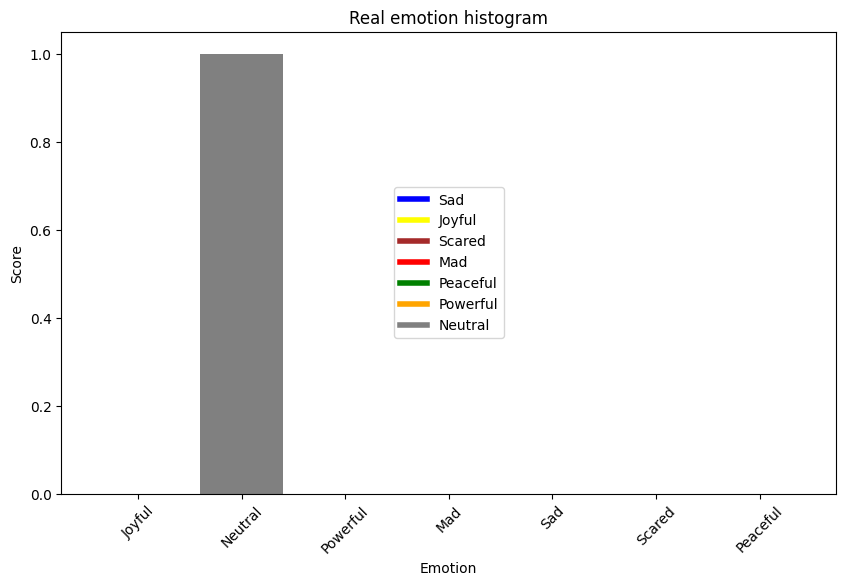

In [ ]:
phrase_to_find = "Sorry I'm late, I was stuck at work. There was this big dinosaur.. thing.. anyway."
row_index = find_row_with_phrase(df, phrase_to_find)
plot_emotion_histogram(df, row_index, color_mapping_0)

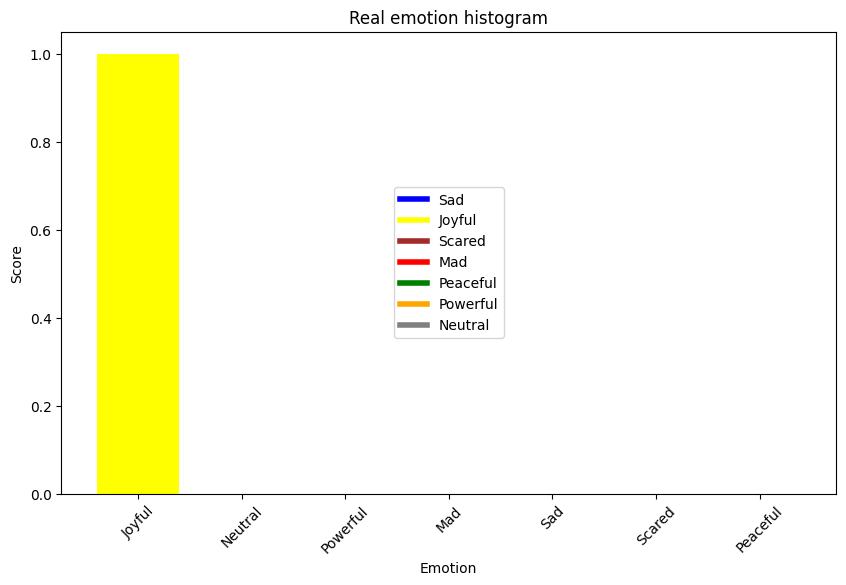

In [ ]:
phrase_to_find = "Oh my God! Ohh! Look at this one! It's so beautiful!"
row_index = find_row_with_phrase(df, phrase_to_find)
plot_emotion_histogram(df, row_index, color_mapping_0)

## Distilbert-base-uncased-emotion

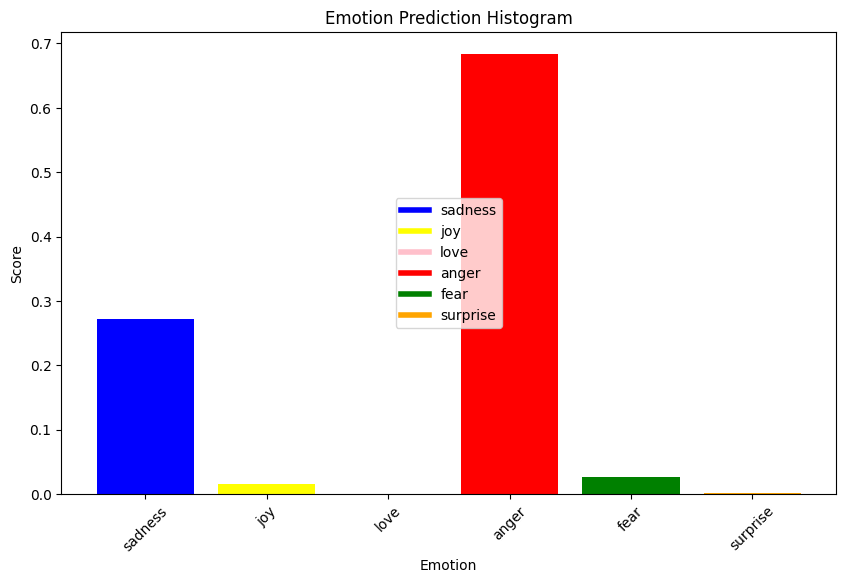

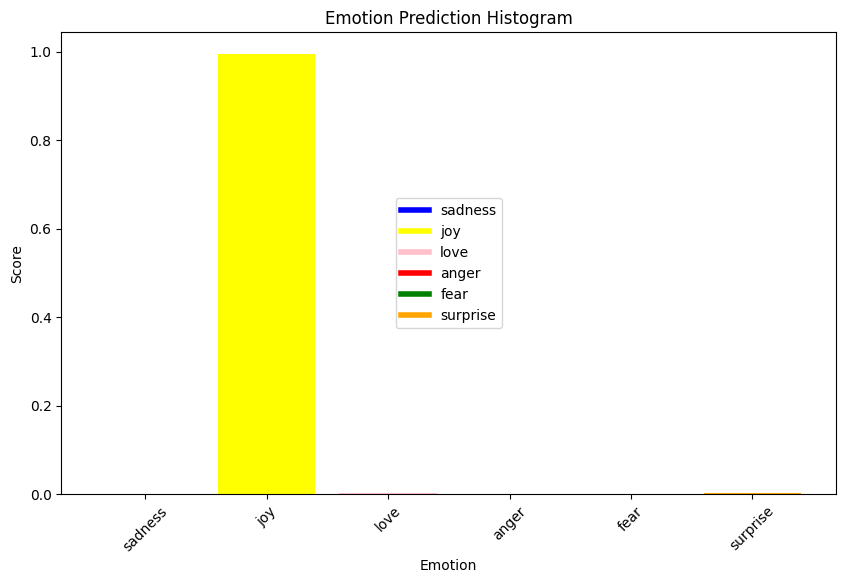

[[{'label': 'sadness', 'score': 0.0008673746488057077},
  {'label': 'joy', 'score': 0.9940580129623413},
  {'label': 'love', 'score': 0.001700786640867591},
  {'label': 'anger', 'score': 0.0003673756727948785},
  {'label': 'fear', 'score': 0.000553538033273071},
  {'label': 'surprise', 'score': 0.002452848246321082}]]

In [ ]:
classifier(distilbert_uncased_emotion, "Sorry I'm late, I was stuck at work. There was this big dinosaur.. thing.. anyway.", color_mapping_1)
classifier(distilbert_uncased_emotion, "Oh my God! Ohh! Look at this one! It's so beautiful!", color_mapping_1)

## Distilroberta-base

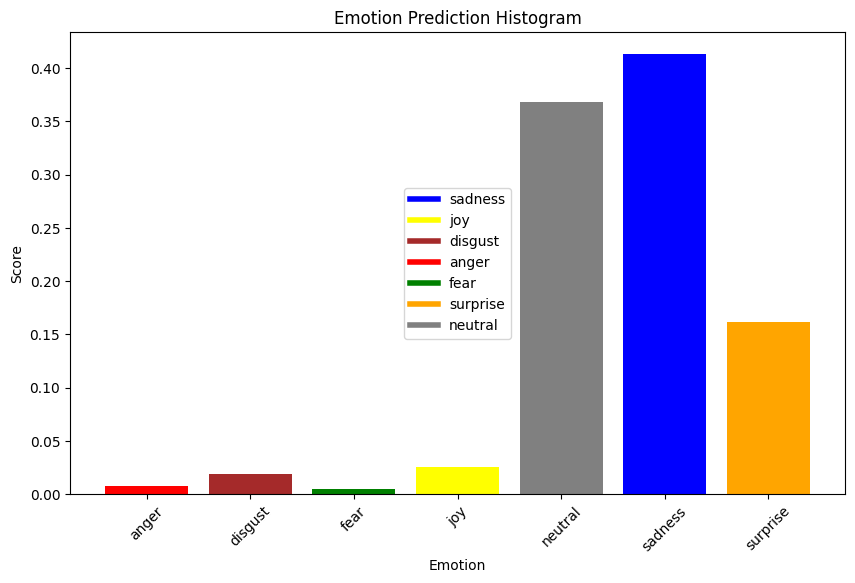

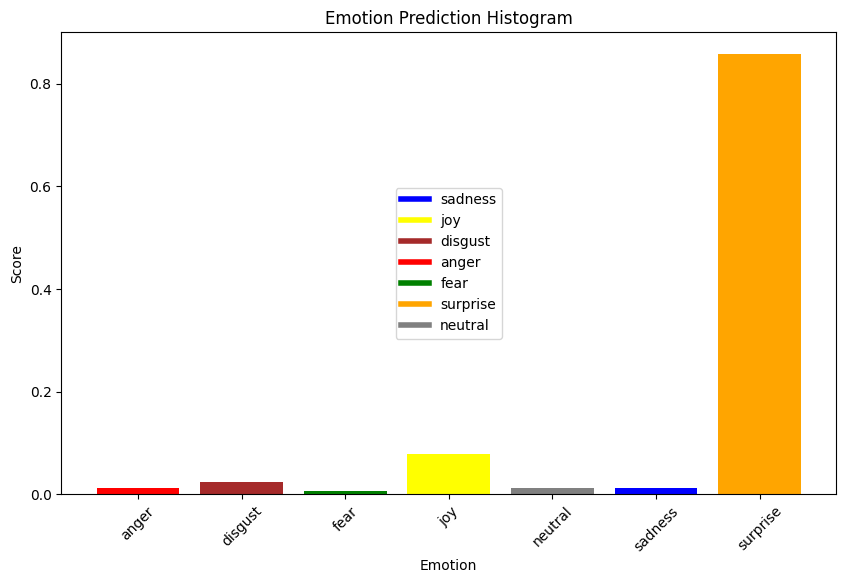

[[{'label': 'anger', 'score': 0.012647036463022232},
  {'label': 'disgust', 'score': 0.022984502837061882},
  {'label': 'fear', 'score': 0.006482298020273447},
  {'label': 'joy', 'score': 0.07747456431388855},
  {'label': 'neutral', 'score': 0.011133978143334389},
  {'label': 'sadness', 'score': 0.011716474778950214},
  {'label': 'surprise', 'score': 0.8575611114501953}]]

In [ ]:
classifier(distilroberta_emotion_english, "Sorry I'm late, I was stuck at work. There was this big dinosaur.. thing.. anyway.", color_mapping_2)
classifier(distilroberta_emotion_english, "Oh my God! Ohh! Look at this one! It's so beautiful!", color_mapping_2)

# 1)Emotion profile

In [ ]:
#Functions for the first dataframe DF0
def analyze_emotions_0(df1, characters_to_include, color_mapping):
    filtered_df = df1[df1['speakers'].isin(characters_to_include)]
    emotion_counts = filtered_df['emotion'].value_counts()
    percentage_value = (emotion_counts / emotion_counts.sum()) * 100
    results = pd.DataFrame({'Emotion': percentage_value.index, 'Percentage': percentage_value.values})
    emotion_colors = [color_mapping[emotion] for emotion in results['Emotion']]
    plt.figure(figsize=(8, 8))
    plt.pie(results['Percentage'], labels=results['Emotion'], autopct='%1.1f%%', startangle=140,
            colors=emotion_colors)
    plt.title('Distribution of emotion in the dataframe')
    plt.axis('equal')
    plt.show()

    return results

def analyze_emotions_for_seasons_0(df1, color_mapping):
    df1['season'] = df1['episode_id'].str.extract(r'(s\d+)')
    emotion_counts = df1.groupby(['season', 'emotion']).size().unstack(fill_value=0)
    percentage_value = emotion_counts.apply(lambda x: x / x.sum(), axis=1) * 100
    plt.figure(figsize=(12, 8))
    for i, emotion in enumerate(percentage_value.columns):
        plt.plot(percentage_value.index, percentage_value[emotion], marker='o', label=emotion, color=color_mapping[emotion])
    plt.title('Distribution of emotion for each season', fontsize=16)
    plt.xlabel('Season', fontsize=14)
    plt.ylabel('Percentage', fontsize=14)
    plt.legend(loc='upper right')
    plt.show()

def calculate_emotion_percentage_0(data_frame, speakers_to_include):
    filtered_df = data_frame[data_frame['speakers'].isin(speakers_to_include)]
    emotion_counts = filtered_df.groupby(['speakers', 'emotion']).size().unstack(fill_value=0)
    total_utterances = emotion_counts.sum(axis=1)
    emotion_percentages = emotion_counts.divide(total_utterances, axis=0) * 100
    emotion_percentages.reset_index(inplace=True)
    emotion_percentages.columns.name = None
    return emotion_percentages

#Functions for the dataframe computed with transformers DF1 and DF2
def analyze_emotions_for_dataframe(df1, characters_to_include, color_mapping):
    filtered_df = df1[df1['speakers'].isin(characters_to_include)]
    emotion_counts = filtered_df['max_emotion_label'].value_counts()
    percentage_value = (emotion_counts / emotion_counts.sum()) * 100
    results = pd.DataFrame({'Emotion': percentage_value.index, 'Percentage': percentage_value.values})
    emotion_colors = [color_mapping[emotion] for emotion in results['Emotion']]
    plt.figure(figsize=(8, 8))
    plt.pie(results['Percentage'], labels=results['Emotion'], autopct='%1.1f%%', startangle=140,
            colors=emotion_colors)
    plt.title('Distribution of emotion in the dataframe')
    plt.axis('equal')
    plt.show()

    return results

def analyze_emotions_for_seasons(df1, color_mapping):
    df1['season'] = df1['episode_id'].str.extract(r'(s\d+)')
    emotion_counts = df1.groupby(['season', 'max_emotion_label']).size().unstack(fill_value=0)
    percentage_value = emotion_counts.apply(lambda x: x / x.sum(), axis=1) * 100
    plt.figure(figsize=(12, 8))
    for i, emotion in enumerate(percentage_value.columns):
        plt.plot(percentage_value.index, percentage_value[emotion], marker='o', label=emotion, color=color_mapping[emotion])
    plt.title('Distribution of emotion for each season', fontsize=16)
    plt.xlabel('Season', fontsize=14)
    plt.ylabel('Percentage', fontsize=14)
    plt.legend(loc='upper right')
    plt.show()

def calculate_emotion_percentage(data_frame, speakers_to_include):
    filtered_df = data_frame[data_frame['speakers'].isin(speakers_to_include)]
    emotion_counts = filtered_df.groupby(['speakers', 'max_emotion_label']).size().unstack(fill_value=0)
    total_utterances = emotion_counts.sum(axis=1)
    emotion_percentages = emotion_counts.divide(total_utterances, axis=0) * 100
    emotion_percentages.reset_index(inplace=True)
    emotion_percentages.columns.name = None
    return emotion_percentages


#Function to plot value for characters
def plot_emotion_histogram(df, colors, figsize=(16, 10), title_fontsize=16, label_fontsize=14, text_fontsize=12, legend_fontsize=12, **kwargs):
    plt.figure(figsize=figsize)
    ax = df.set_index('speakers').plot(kind='bar', stacked=True, color=[colors[emotion] for emotion in df.columns[1:]], **kwargs)
    plt.title('Emotion Distribution for Speakers', fontsize=title_fontsize)
    plt.xlabel('Speakers', fontsize=label_fontsize)
    plt.ylabel('Percentage', fontsize=label_fontsize)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width / 2, y + height / 2, '{:.0f}%'.format(height), ha='center', va='center', fontsize=text_fontsize)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Emotions', bbox_to_anchor=(1, 1), fontsize=legend_fontsize)

    plt.show()

#Funciton to analyze utterance emotion percentage
def parse_emotion_string(emotion_string):
    try:
        emotion_string = emotion_string.replace("'", "\"")
        emotion_list = json.loads(emotion_string)
        emotion_dict = {entry['label']: entry['score'] for entry in emotion_list[0]}
        emotion_df = pd.DataFrame.from_dict(emotion_dict, orient='index', columns=['score'])
        emotion_df.reset_index(inplace=True)
        emotion_df.rename(columns={'index': 'label'}, inplace=True)
        return emotion_df
    except (json.JSONDecodeError, KeyError):
        return None


result_df = pd.DataFrame()

## DF0

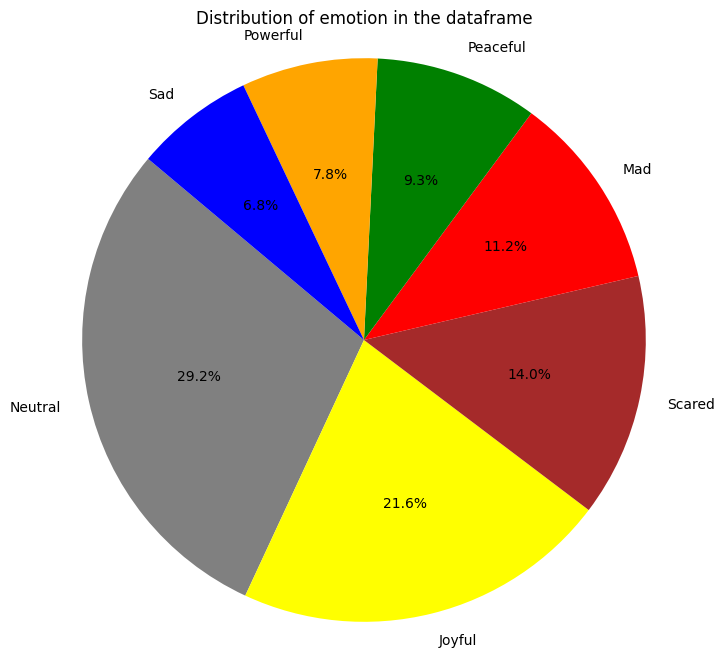

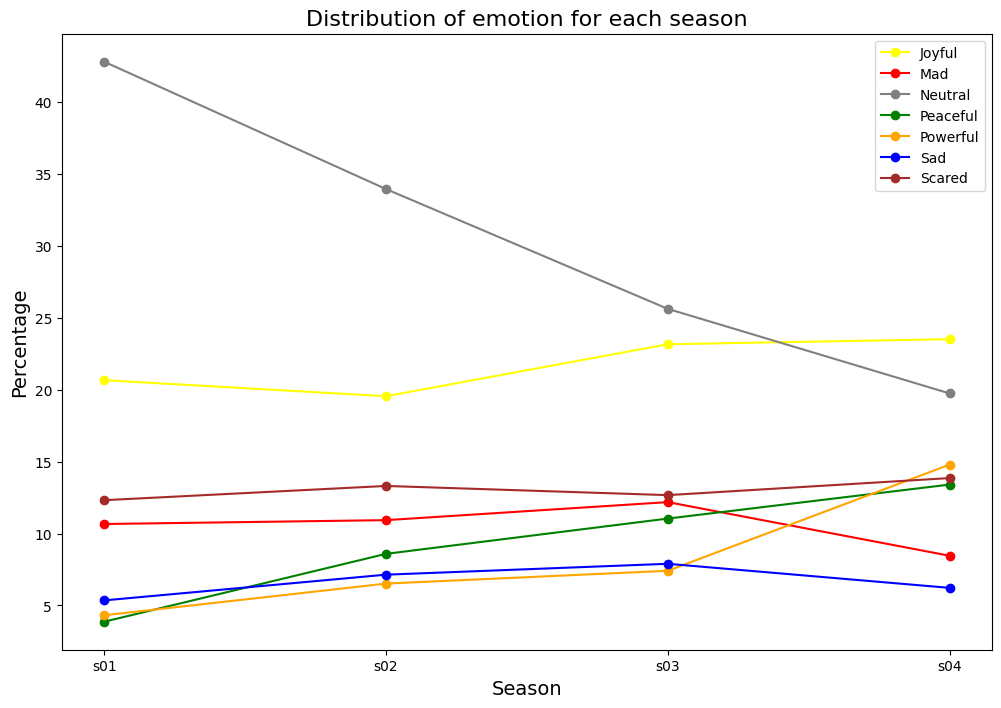

In [ ]:
character_analysis_results = analyze_emotions_0(df, speakers_to_include, color_mapping_0)
season_analysis_results = analyze_emotions_for_seasons_0(df, color_mapping_0)

In [ ]:
emotion_percentages_0 = calculate_emotion_percentage_0(df, speakers_to_include)
emotion_percentages_0

speakers     Joyful        Mad    Neutral  Peaceful  Powerful  \
0   Chandler Bing  22.191011  12.303371  30.842697  9.550562  7.977528   
1  Joey Tribbiani  23.525682   7.799620  29.676601  9.321497  9.067850   
2   Monica Geller  20.097442  12.911084  29.415347  9.074300  7.308161   
3   Phoebe Buffay  24.775353   7.702182  28.754814  9.499358  7.830552   
4    Rachel Green  20.565553  15.681234  26.928021  8.933162  7.455013   
5     Ross Geller  18.796992  10.815500  29.265471  9.658762  7.287449   

        Sad     Scared  
0  4.606742  12.528090  
1  6.531389  14.077362  
2  7.673569  13.520097  
3  8.279846  13.157895  
4  7.647815  12.789203  
5  6.651243  17.524581

<Figure size 1600x1000 with 0 Axes>

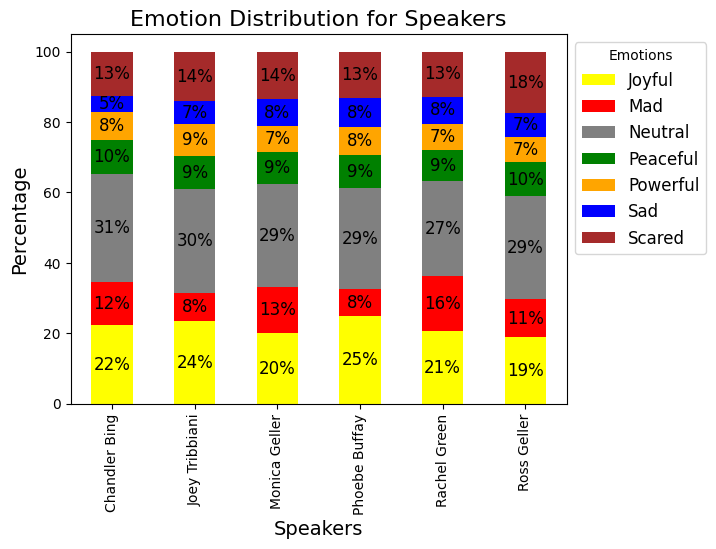

In [ ]:
plot_emotion_histogram(emotion_percentages_0, color_mapping_0)

## DF1

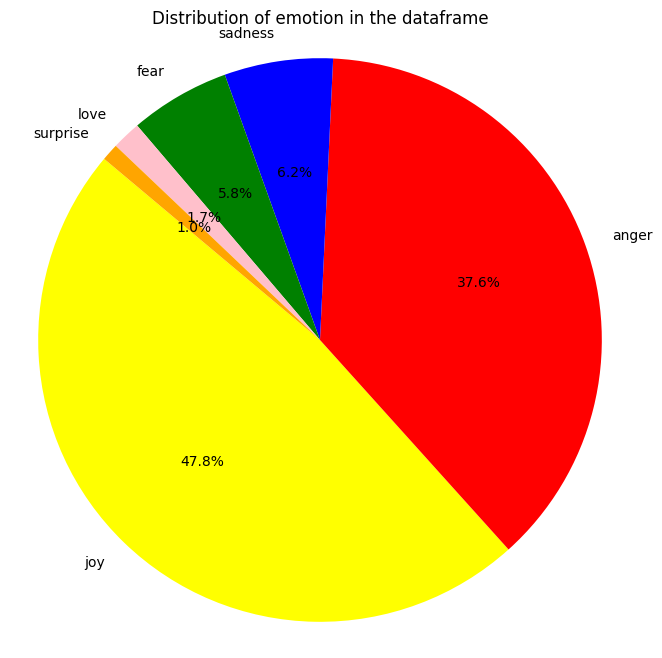

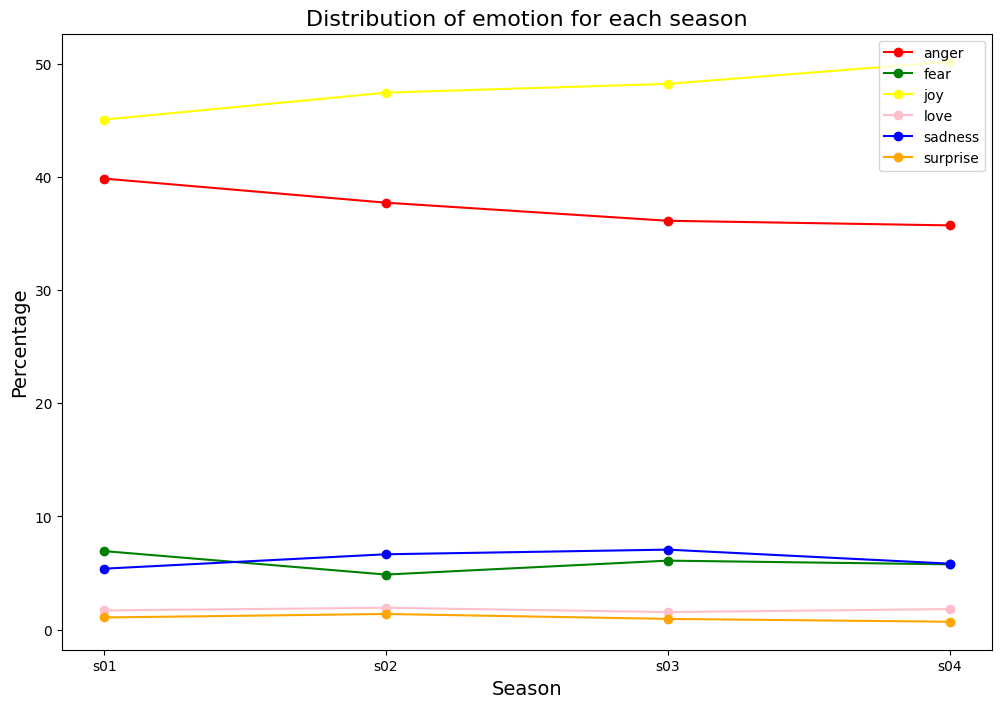

In [ ]:
character_analysis_results = analyze_emotions_for_dataframe(df1, speakers_to_include, color_mapping_1)
season_analysis_results = analyze_emotions_for_seasons(df1, color_mapping_1)

In [ ]:
emotion_percentages_1 = calculate_emotion_percentage(df1, speakers_to_include)
emotion_percentages_1

speakers      anger      fear        joy      love   sadness  \
0   Chandler Bing  39.101124  4.943820  47.078652  1.741573  6.292135   
1  Joey Tribbiani  39.885859  5.136335  47.685479  1.838935  4.819277   
2   Monica Geller  41.534714  6.272838  43.422655  0.913520  6.333739   
3   Phoebe Buffay  33.311938  6.097561  50.320924  1.861361  7.637997   
4    Rachel Green  35.861183  5.719794  48.200514  2.249357  6.812339   
5     Ross Geller  35.627530  6.362059  50.028918  1.445922  5.552342   

   surprise  
0  0.842697  
1  0.634115  
2  1.522533  
3  0.770218  
4  1.156812  
5  0.983227

<Figure size 1600x1000 with 0 Axes>

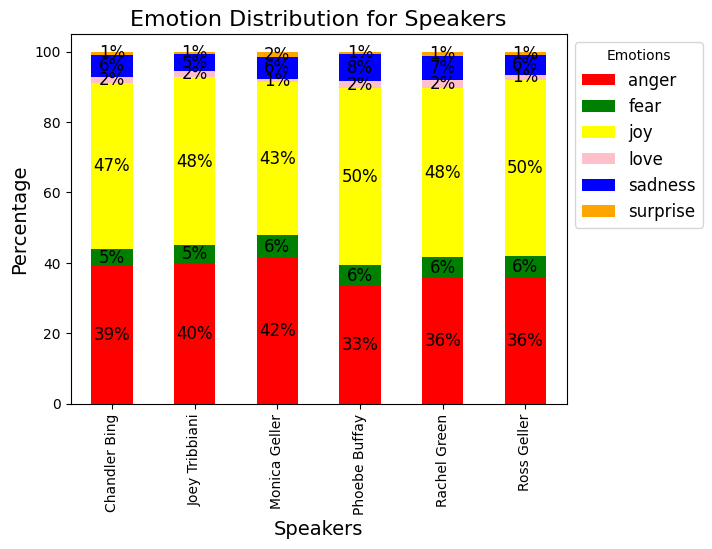

In [ ]:
plot_emotion_histogram(emotion_percentages_1, color_mapping_1)

## DF2

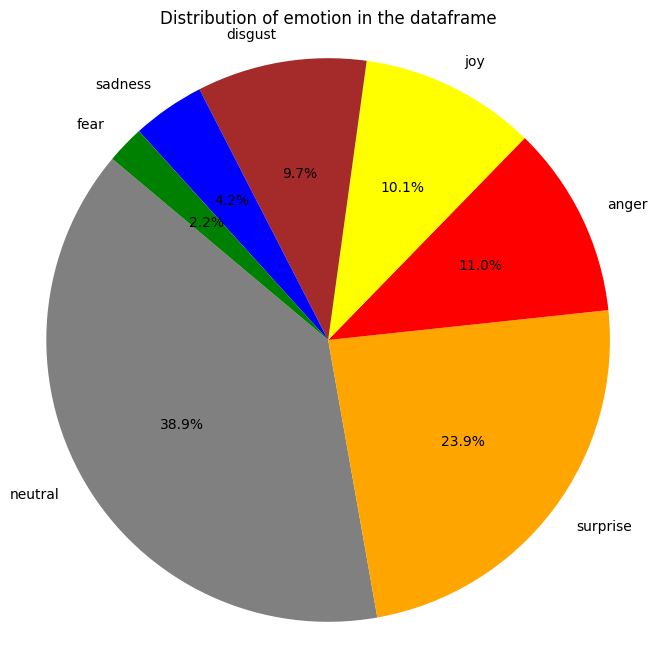

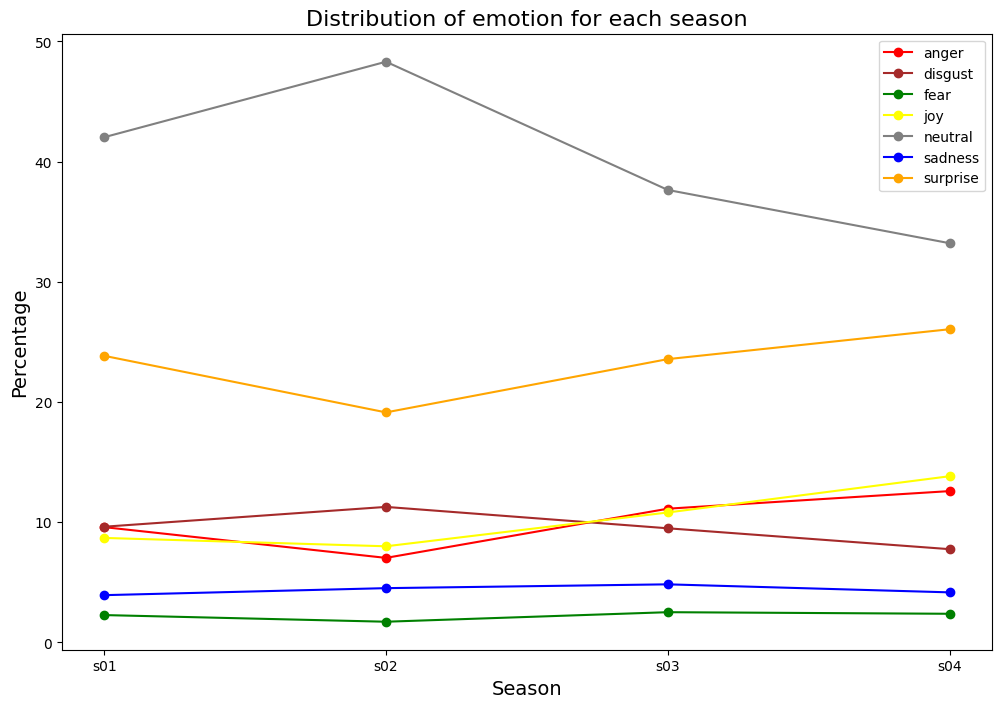

In [ ]:
character_analysis_results = analyze_emotions_for_dataframe(df2, speakers_to_include, color_mapping_2)
season_analysis_results = analyze_emotions_for_seasons(df2, color_mapping_2)

In [ ]:
emotion_percentages_2 = calculate_emotion_percentage(df2, speakers_to_include)
emotion_percentages_2

speakers      anger    disgust      fear        joy    neutral  \
0   Chandler Bing  13.370787   9.157303  2.584270   8.988764  41.348315   
1  Joey Tribbiani  10.906785  11.350666  2.155992  10.653139  37.856690   
2   Monica Geller  10.231425   8.708892  1.948843   9.439708  38.672351   
3   Phoebe Buffay  11.232349  12.836970  2.631579  10.847240  36.200257   
4    Rachel Green  10.604113   8.611825  1.670951   9.832905  36.632391   
5     Ross Geller   9.658762   8.039329  2.024291  10.931174  42.047426   

    sadness   surprise  
0  3.483146  21.067416  
1  2.980342  24.096386  
2  4.506699  26.492083  
3  4.621309  21.630295  
4  4.562982  28.084833  
5  4.858300  22.440717

<Figure size 1600x1000 with 0 Axes>

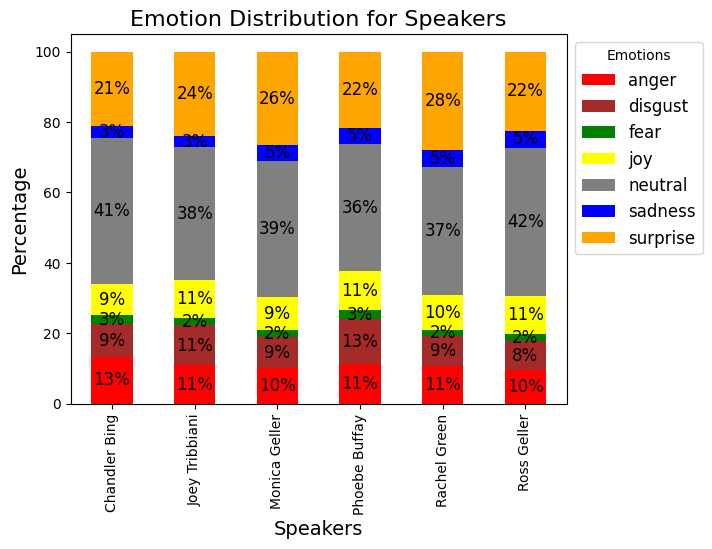

In [ ]:
plot_emotion_histogram(emotion_percentages_2, color_mapping_2)

#2) HOW EMOTION EVOLVES OVER TIME

In [ ]:
def visualize_emotion_percentages_0(df, color_mapping, emotions, speakers_to_include):
    emotion_counts_per_episode = df.groupby(['speakers', 'episode_id', 'emotion']).size().unstack(fill_value=0)
    emotion_counts_per_episode = emotion_counts_per_episode[emotion_counts_per_episode.index.get_level_values('speakers').isin(speakers_to_include)]

    total_utterances_per_episode = emotion_counts_per_episode.sum(axis=1)
    emotion_percentages_per_episode = emotion_counts_per_episode.divide(total_utterances_per_episode, axis=0) * 100
    emotion_percentages_per_episode.reset_index(inplace=True)
    emotion_percentages_per_episode.columns.name = None

    for speaker in speakers_to_include:
        speaker_data = emotion_percentages_per_episode[emotion_percentages_per_episode['speakers'] == speaker]

        plt.figure(figsize=(14, 6))
        for idx, emotion in enumerate(emotions):
            plt.plot(
                speaker_data['episode_id'],
                speaker_data[emotion] / 100,
                label=emotion.capitalize(),
                color=color_mapping.get(emotion, 'black')
            )

        plt.xlabel('Episode')
        plt.ylabel('Emotion Percentage (%)')
        plt.title(f'Emotion Percentages Over Episodes for {speaker}')
        plt.xticks(rotation=90)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


def visualize_emotion_percentages(df, color_mapping, emotions, speakers_to_include):
    emotion_counts_per_episode = df.groupby(['speakers', 'episode_id', 'max_emotion_label']).size().unstack(fill_value=0)
    emotion_counts_per_episode = emotion_counts_per_episode[emotion_counts_per_episode.index.get_level_values('speakers').isin(speakers_to_include)]

    total_utterances_per_episode = emotion_counts_per_episode.sum(axis=1)
    emotion_percentages_per_episode = emotion_counts_per_episode.divide(total_utterances_per_episode, axis=0) * 100
    emotion_percentages_per_episode.reset_index(inplace=True)
    emotion_percentages_per_episode.columns.name = None

    for speaker in speakers_to_include:
        speaker_data = emotion_percentages_per_episode[emotion_percentages_per_episode['speakers'] == speaker]

        plt.figure(figsize=(14, 6))
        for idx, emotion in enumerate(emotions):
            plt.plot(
                speaker_data['episode_id'],
                speaker_data[emotion] / 100,
                label=emotion.capitalize(),
                color=color_mapping.get(emotion, 'black')
            )

        plt.xlabel('Episode')
        plt.ylabel('Emotion Percentage (%)')
        plt.title(f'Emotion Percentages Over Episodes for {speaker}')
        plt.xticks(rotation=90)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


##DF0

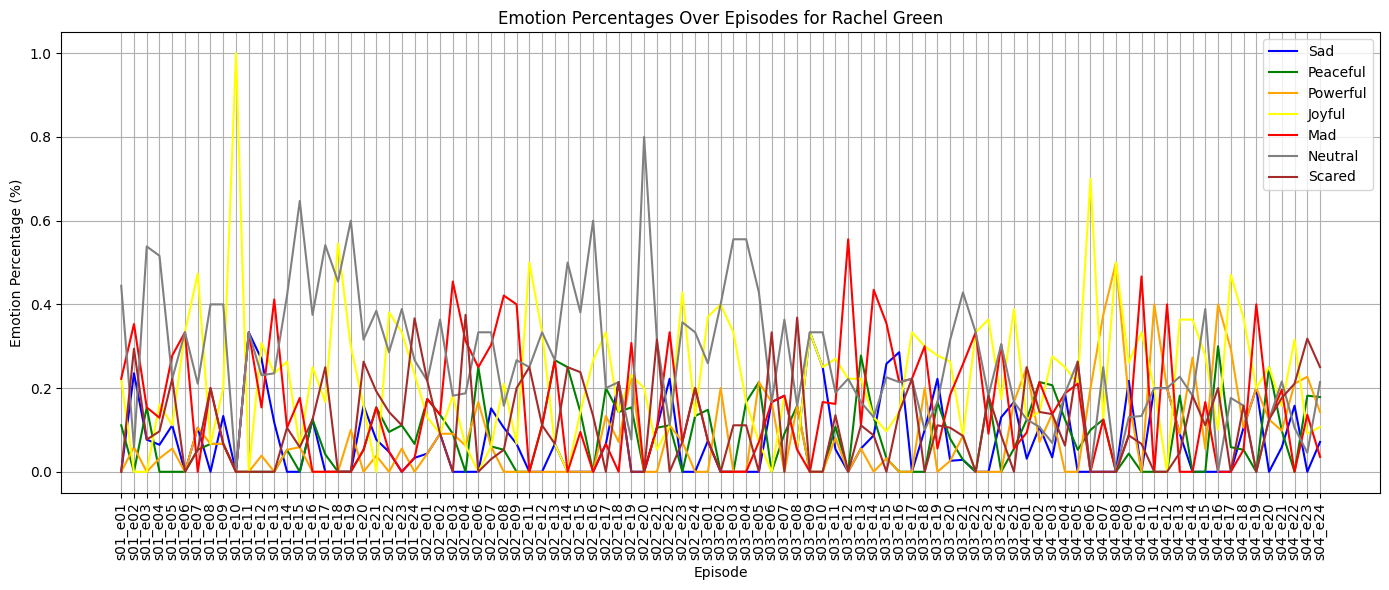

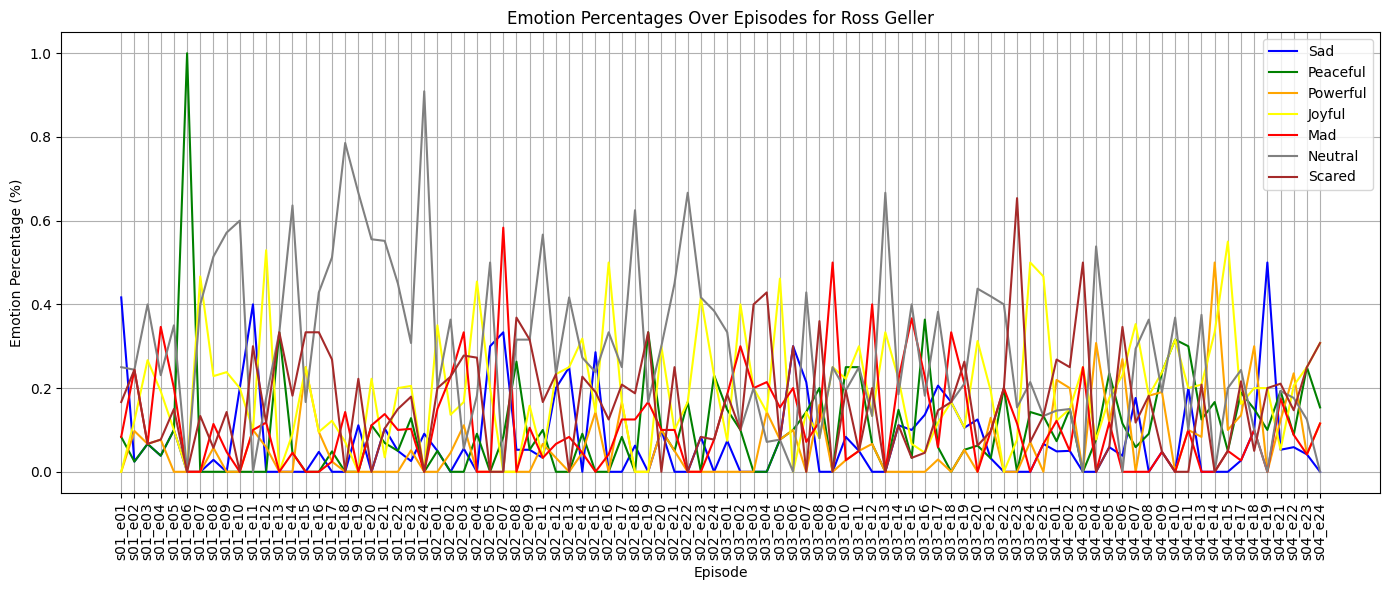

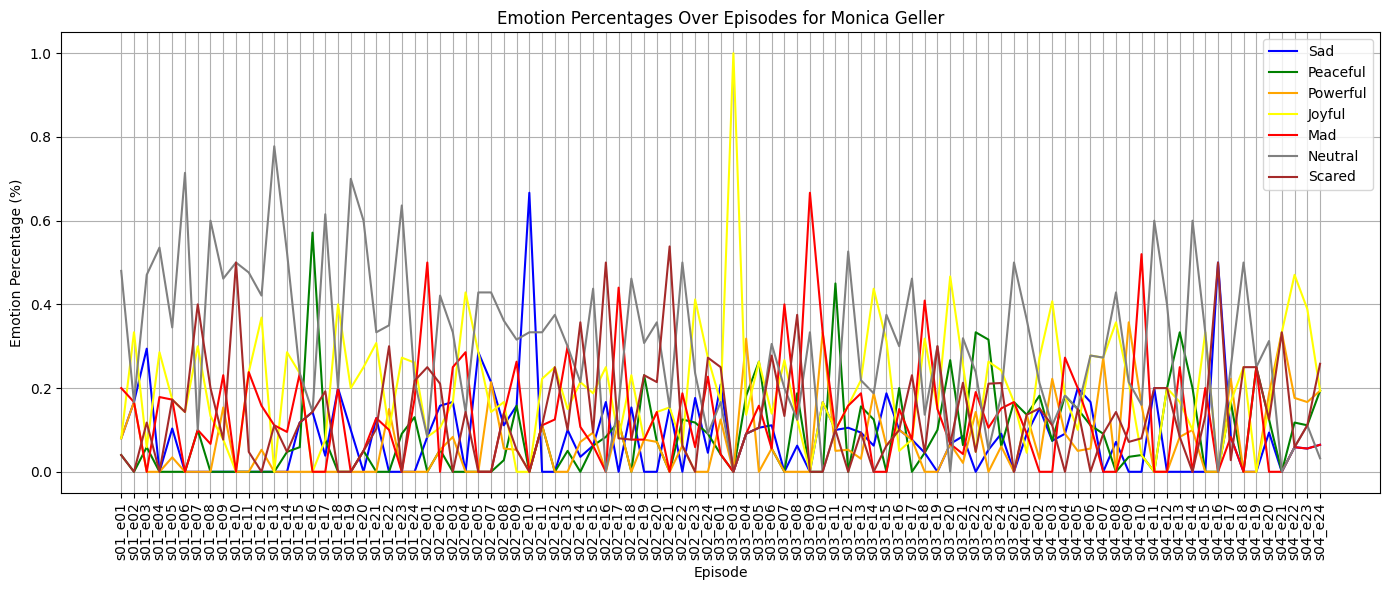

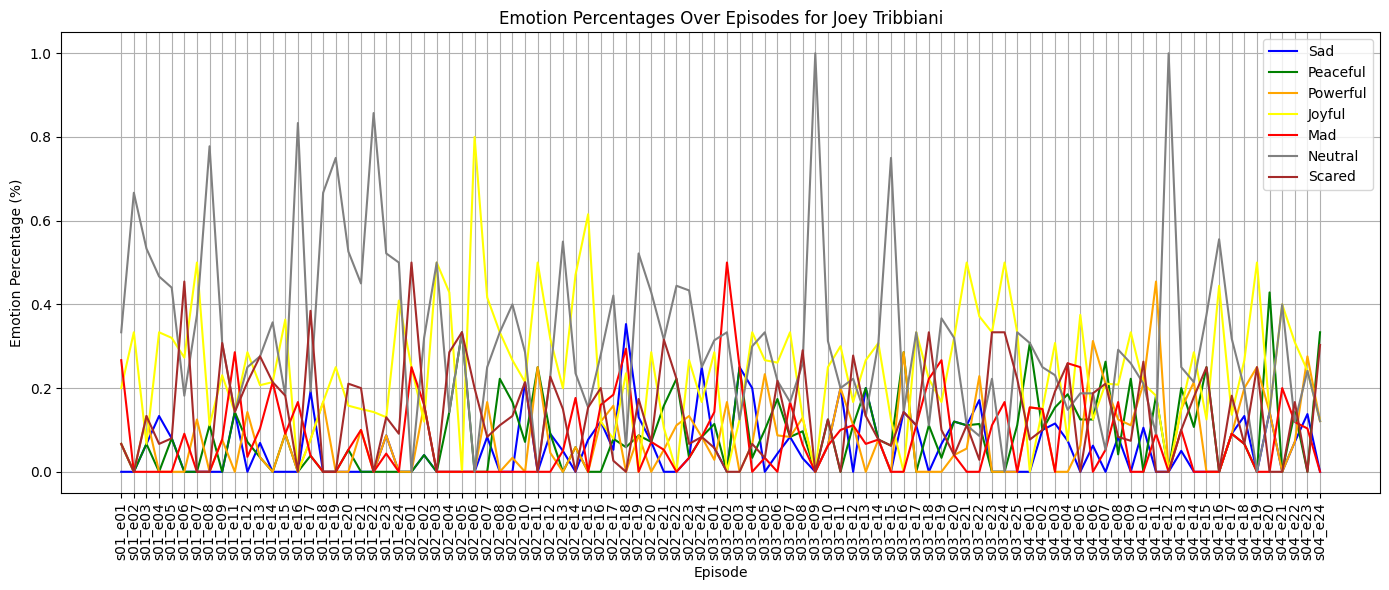

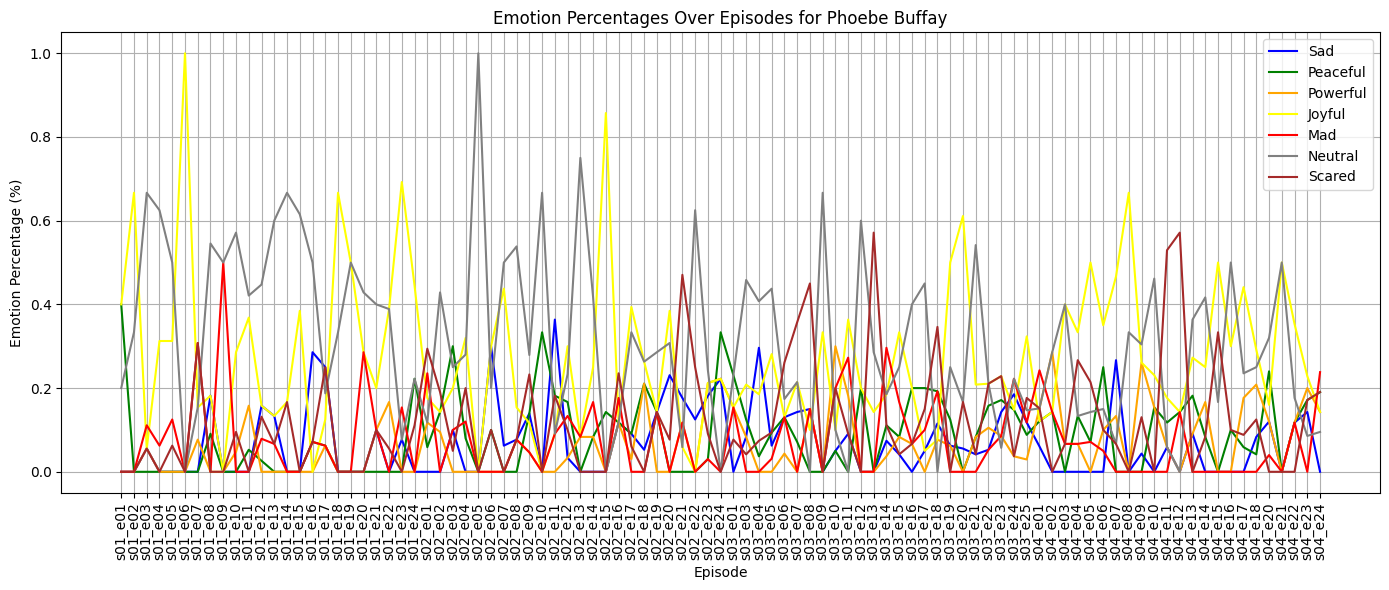

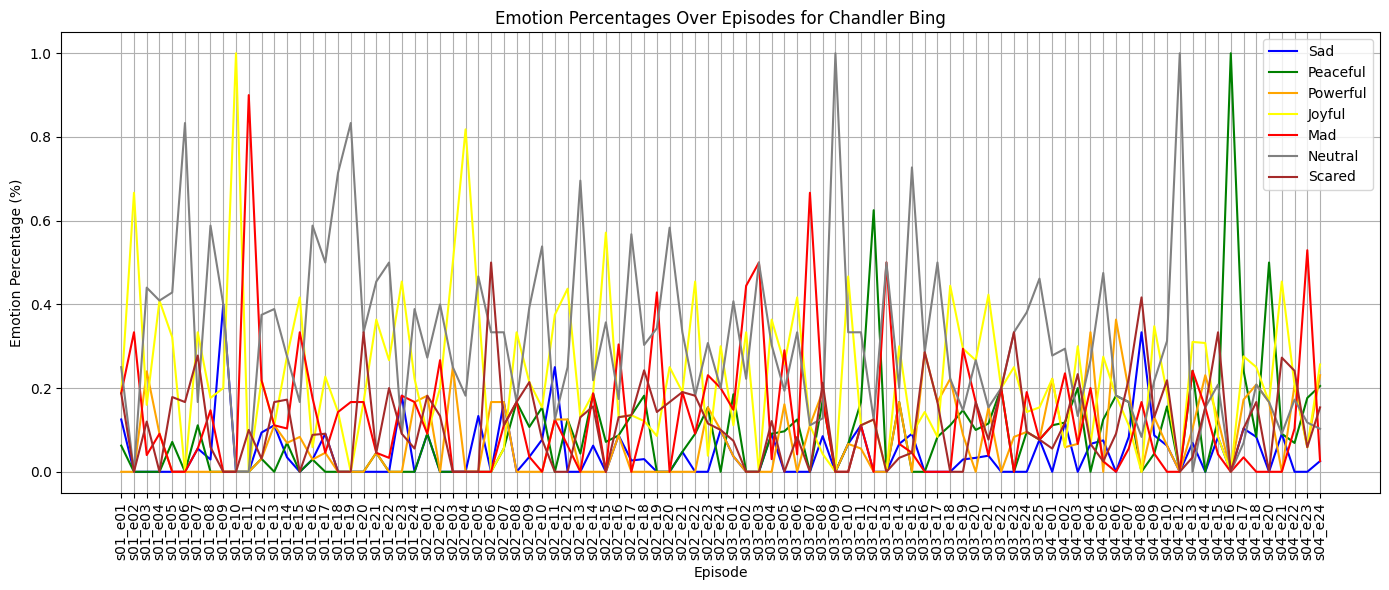

In [ ]:
visualize_emotion_percentages_0(df, color_mapping_0, emotions_0, speakers_to_include)

##DF1

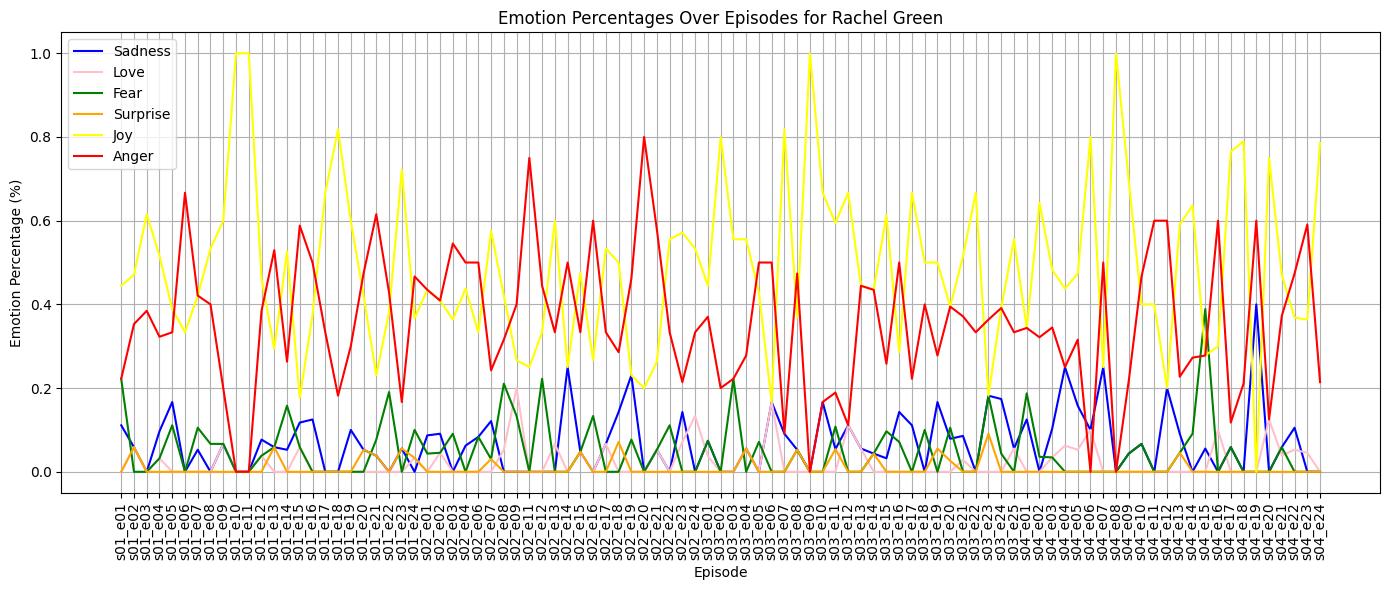

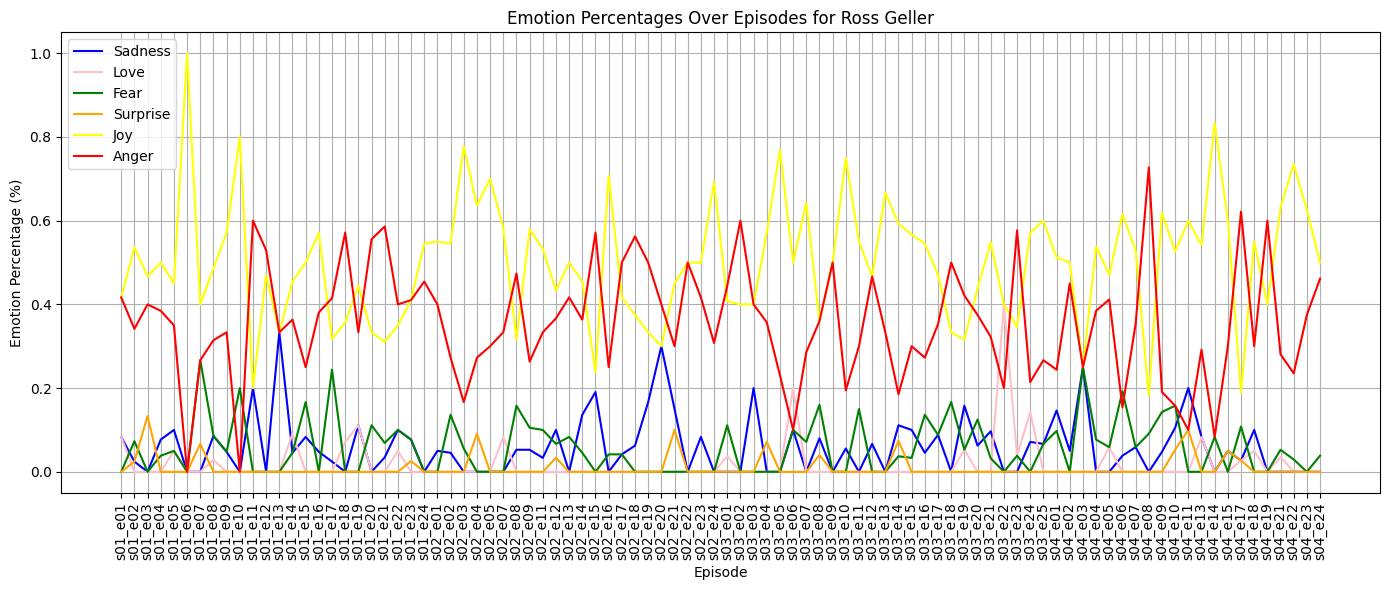

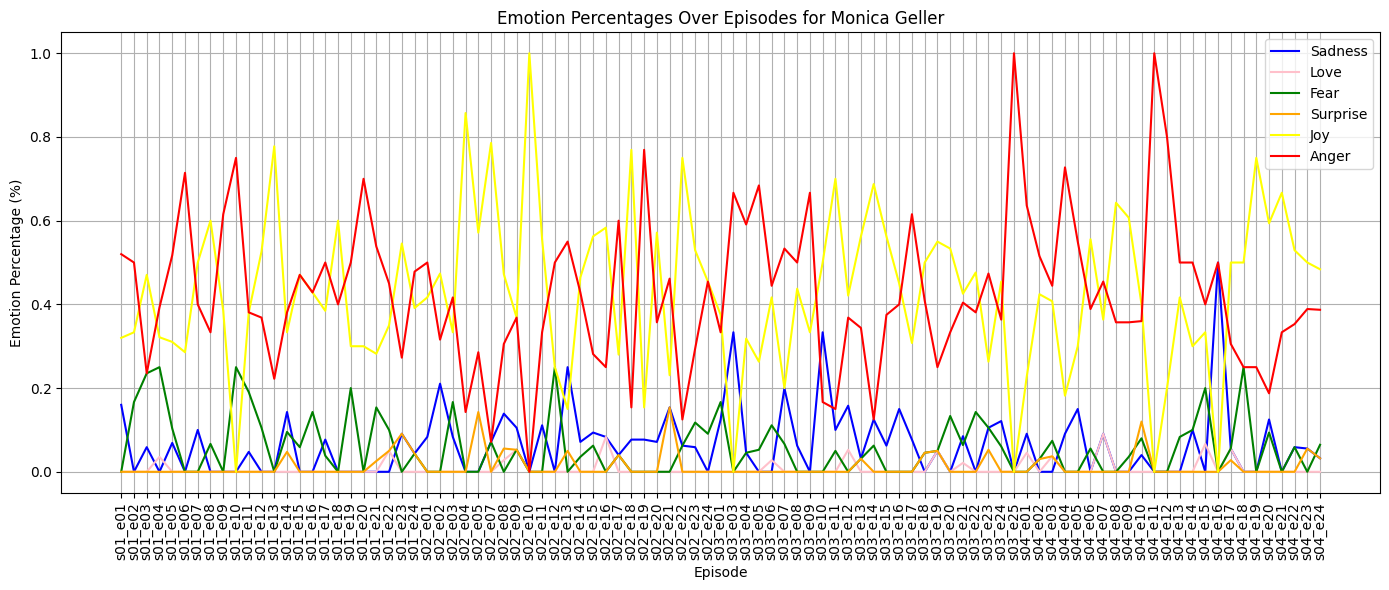

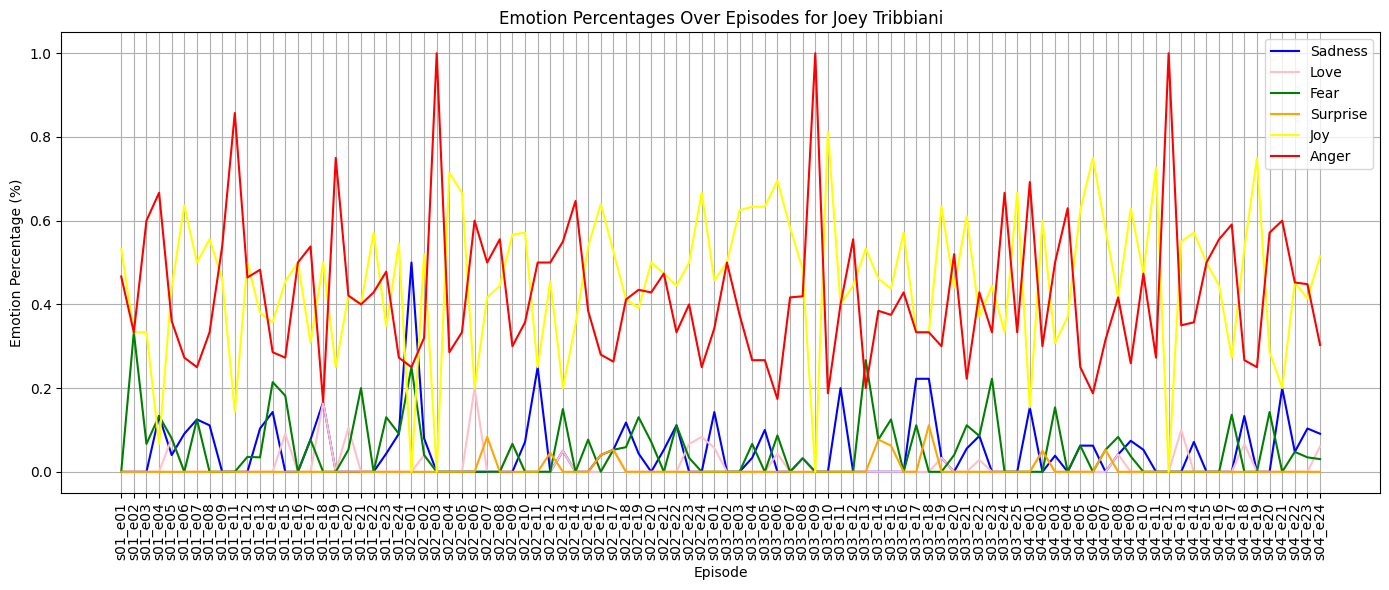

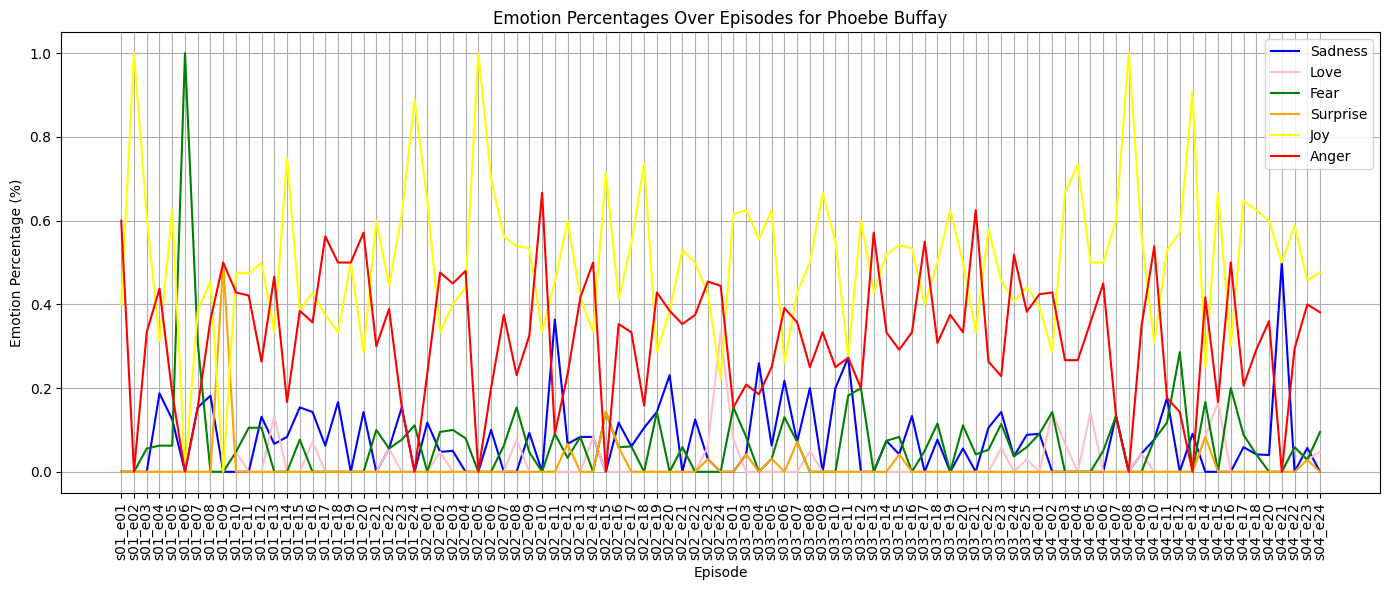

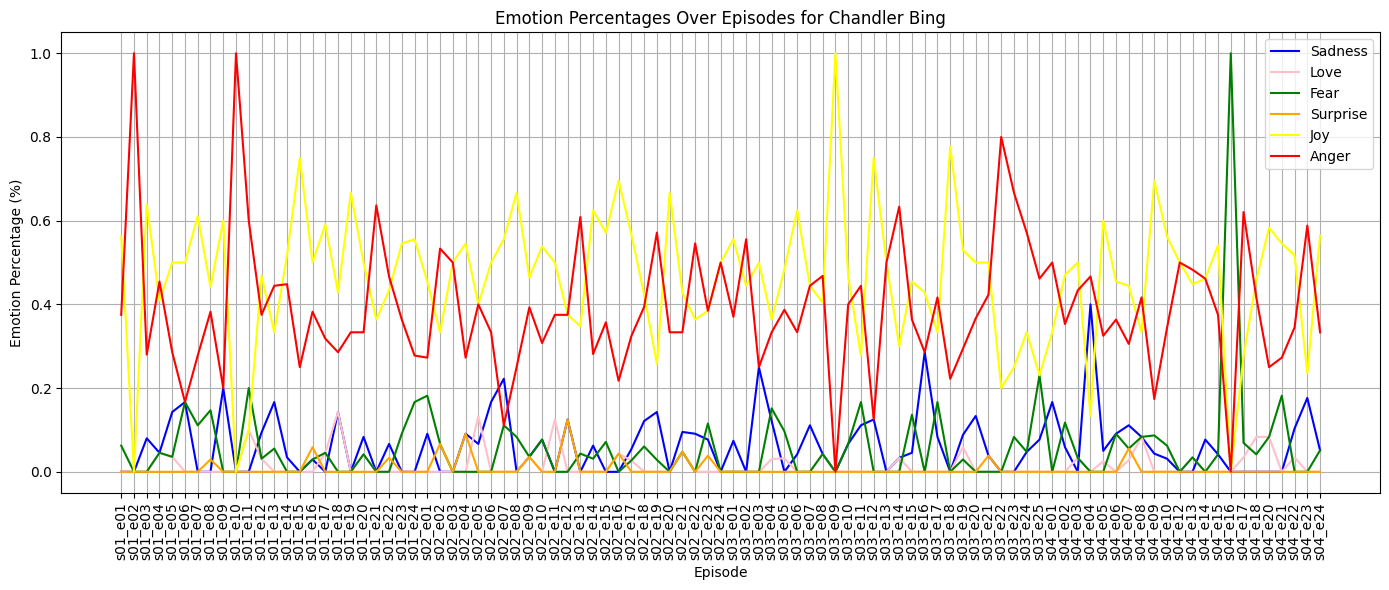

In [ ]:
visualize_emotion_percentages(df1, color_mapping_1, emotions_1, speakers_to_include)

## D2

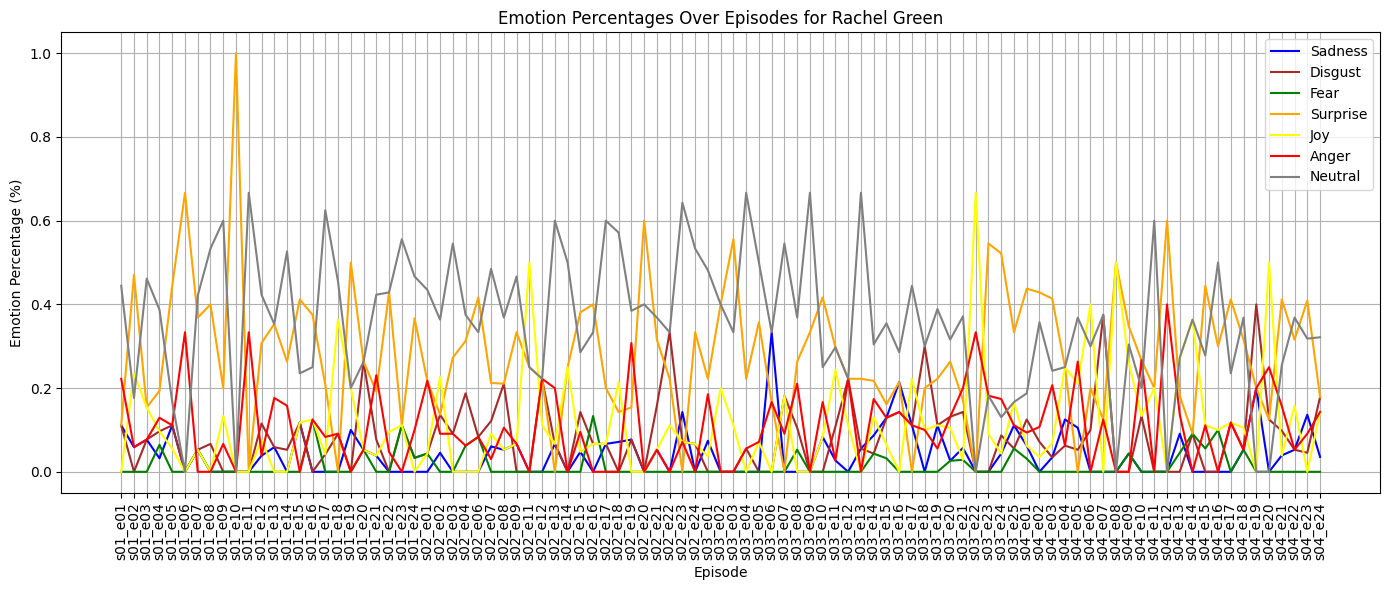

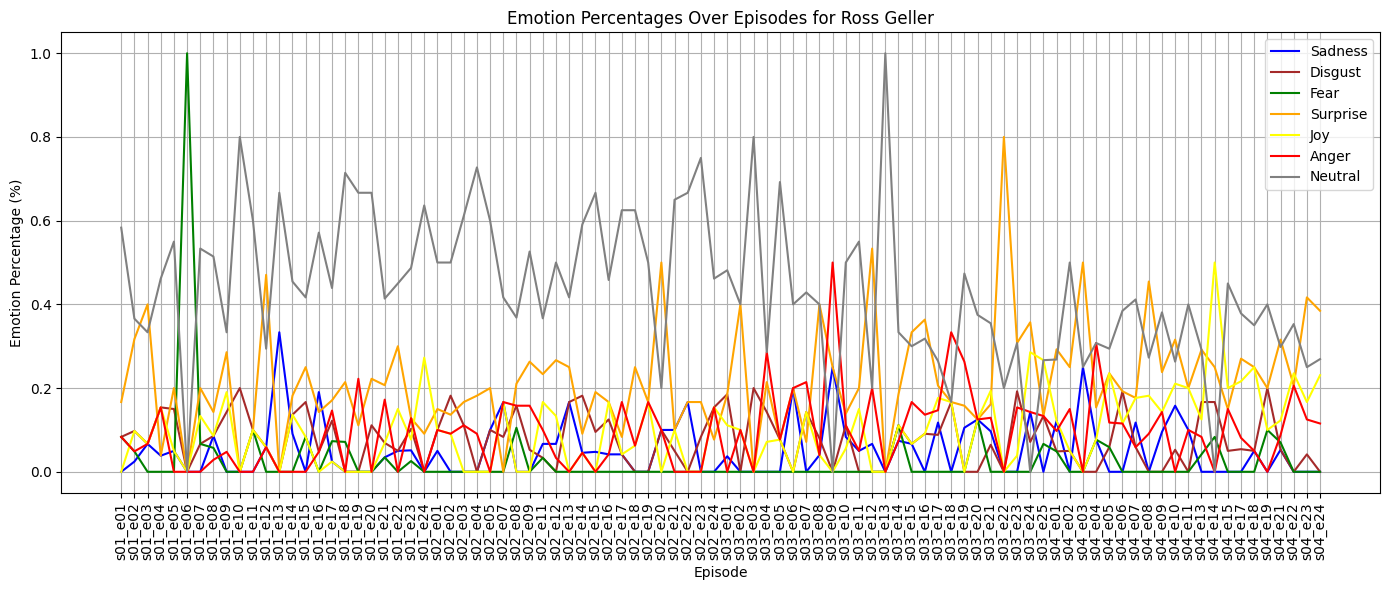

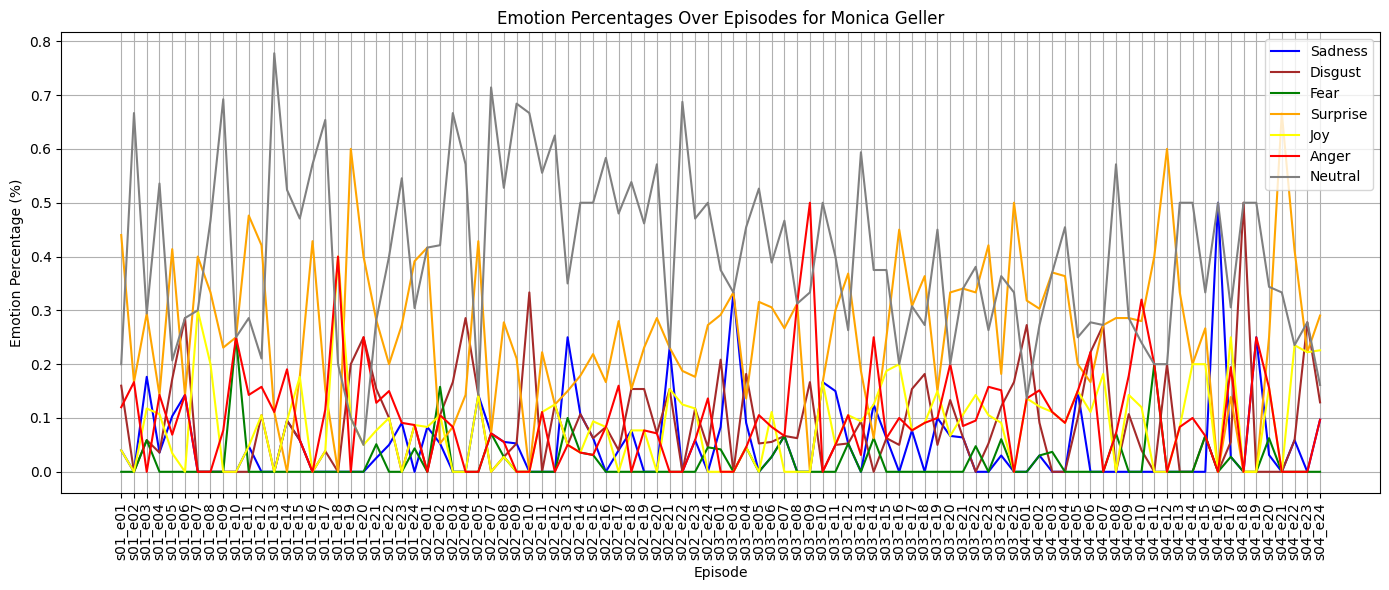

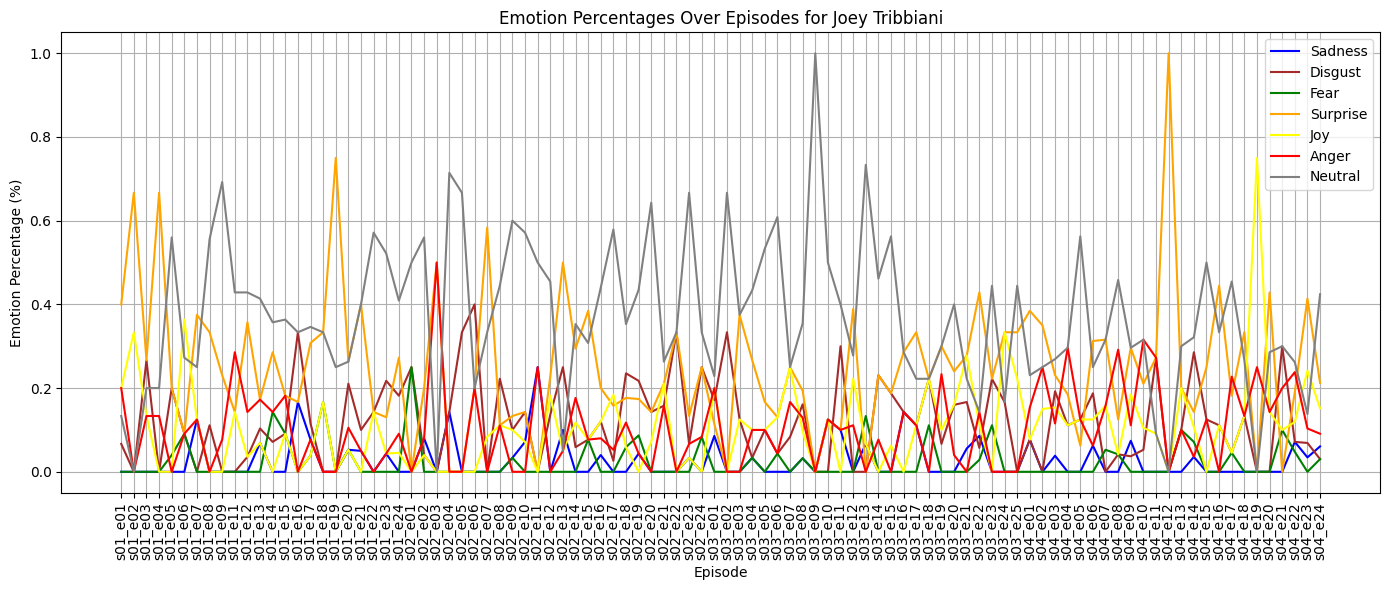

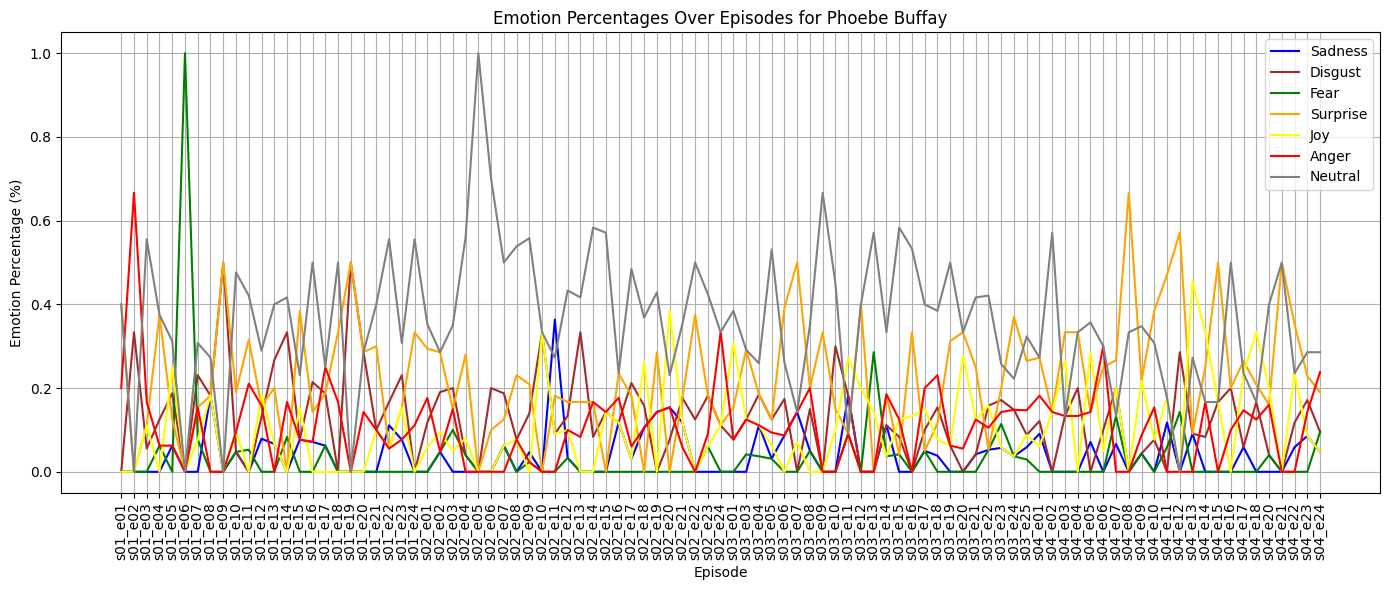

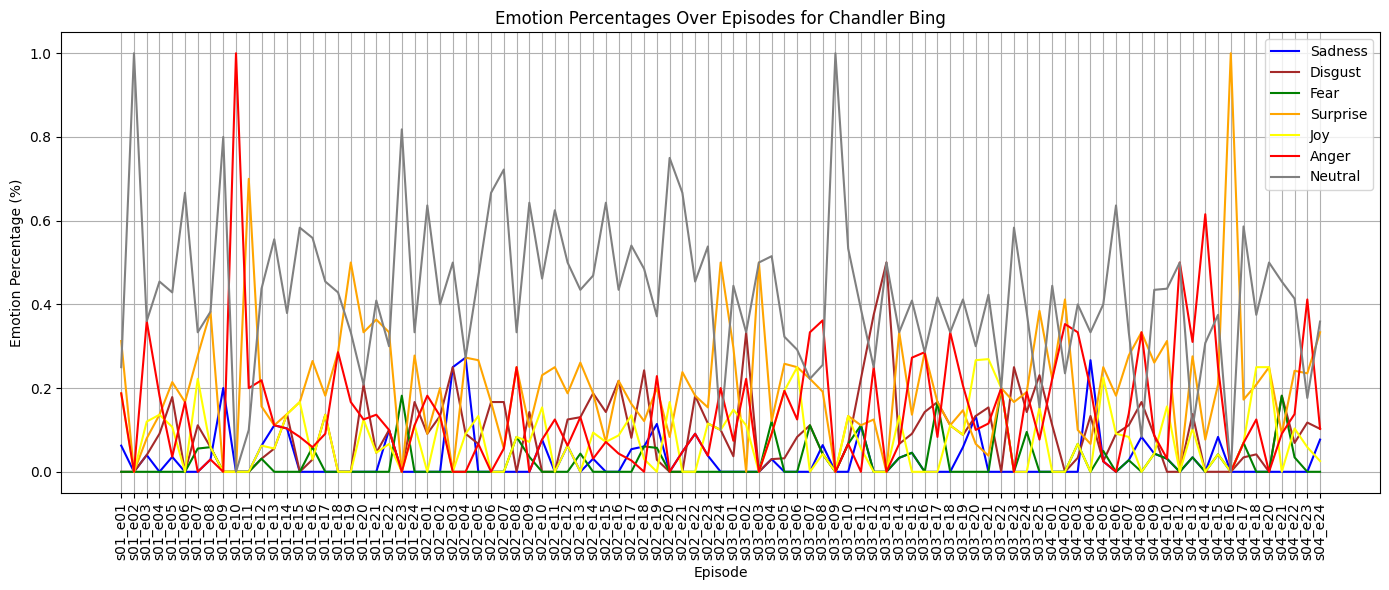

In [ ]:
visualize_emotion_percentages(df2, color_mapping_2, emotions_2, speakers_to_include)

#3)HOW DIFFERENT SPEAKERS HAVE AN IMPACT ON EACH OTHER

In [ ]:
def group_dataframe_by_column(data_frame, column_to_group):
    grouped_data = data_frame.groupby(column_to_group)
    grouped_dataframes = {}
    for group_value, group_data in grouped_data:
        grouped_dataframes[group_value] = group_data

    return grouped_dataframes

def filter_dataframe_for_characters(data_frame, character1, character2):
    scene_ids_with_characters_only = []
    for scene_id, scene_dataframe in data_frame.items():
        character1_present = any(scene_dataframe['speakers'].apply(lambda x: character1 in x))
        character2_present = any(scene_dataframe['speakers'].apply(lambda x: character2 in x))
        if character1_present and not character2_present:
            scene_ids_with_characters_only.append(scene_id)

    print("Scene IDs with Only", character1, "Present:")
    print(scene_ids_with_characters_only)

    filtered_df = pd.DataFrame()


    for scene_id, scene_dataframe in data_frame.items():
        # Check if the scene_id is in scene_ids_with_characters_only
        if scene_id in scene_ids_with_characters_only:
            # Add the current DataFrame to the filtered DataFrame
            filtered_df = pd.concat([filtered_df, scene_dataframe], ignore_index=True)

    return filtered_df

def filter_scenes_both_characters(grouped_scenes, character_1, character_2):
    scene_ids_with_characters = []

    for scene_id, scene_dataframe in grouped_scenes.items():
        character1_present = any(scene_dataframe['speakers'].apply(lambda x: character_1 in x))
        character2_present = any(scene_dataframe['speakers'].apply(lambda x: character_2 in x))

        if character1_present and character2_present:
            scene_ids_with_characters.append(scene_id)

    # Print the list of scene IDs
    print("Scene IDs with Both", "Present:")
    print(scene_ids_with_characters)

    combined_dataframe = pd.DataFrame()

    for scene_id, scene_dataframe in grouped_scenes.items():
        if scene_id in scene_ids_with_characters:
            combined_dataframe = pd.concat([combined_dataframe, scene_dataframe], ignore_index=True)

    return combined_dataframe

def plot_emotion_percentage_change(df, title, emotion_colors):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df.index, df['percentages'], color=[emotion_colors[emotion] for emotion in df.index])
    plt.xlabel('Emotions')
    plt.ylabel('Percentage Change')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for bar, percentage in zip(bars, df['percentages']):
        height = bar.get_height()
        plt.annotate(f'{percentage:.2f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # Text offset
                     textcoords="offset points",
                     ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

##DF0

In [ ]:
grouped_scenes_0 = group_dataframe_by_column(df, 'scene_id')

In [ ]:
rachel_0 = filter_dataframe_for_characters(grouped_scenes_0, 'Rachel Green', 'Ross Geller')
rachel_0
rachel_df = rachel_0[rachel_0['speakers'] == 'Rachel Green']
emotion_counts_rachel = rachel_df['emotion'].value_counts()
emotion_percentages_rachel_only = (emotion_counts_rachel/ len(rachel_df)) * 100
print("\nEmotion Percentages for Rachel:")
print(emotion_percentages_rachel_only)
ross_0 = filter_dataframe_for_characters(grouped_scenes_0,  'Ross Geller', 'Rachel Green')
ross_0
ross_df = ross_0[ross_0['speakers'] == 'Ross Geller']
emotion_counts_ross = ross_df['emotion'].value_counts()
emotion_percentages_ross_only = (emotion_counts_ross / len(ross_df)) * 100
print("\nEmotion Percentages for Ross:")
print(emotion_percentages_ross_only)

Scene IDs with Only Rachel Green Present:
['s01_e02_c07', 's01_e02_c09', 's01_e04_c04', 's01_e04_c05', 's01_e04_c07', 's01_e04_c12', 's01_e04_c14', 's01_e06_c05', 's01_e07_c03', 's01_e07_c14', 's01_e09_c01', 's01_e09_c10', 's01_e12_c10', 's01_e12_c12', 's01_e13_c01', 's01_e13_c08', 's01_e14_c05', 's01_e14_c08', 's01_e14_c10', 's01_e14_c13', 's01_e14_c16', 's01_e15_c06', 's01_e15_c10', 's01_e16_c16', 's01_e17_c03', 's01_e17_c09', 's01_e19_c02', 's01_e20_c03', 's01_e20_c05', 's01_e20_c07', 's01_e20_c11', 's01_e21_c02', 's01_e21_c04', 's01_e21_c08', 's01_e21_c11', 's01_e22_c04', 's01_e23_c10', 's01_e23_c14', 's01_e23_c17', 's01_e24_c03', 's01_e24_c06', 's01_e24_c08', 's02_e01_c06', 's02_e01_c12', 's02_e02_c04', 's02_e02_c11', 's02_e02_c13', 's02_e03_c03', 's02_e03_c06', 's02_e03_c09', 's02_e04_c01', 's02_e04_c09', 's02_e06_c02', 's02_e06_c05', 's02_e07_c01', 's02_e07_c05', 's02_e07_c07', 's02_e08_c01', 's02_e08_c05', 's02_e08_c07', 's02_e12_c09', 's02_e13_c08', 's02_e13_c11', 's02_e14_c09

In [ ]:
rachel_ross = filter_scenes_both_characters(grouped_scenes_0, 'Rachel Green', 'Ross Geller')
rachel_only_df = rachel_ross[rachel_ross['speakers'] == 'Rachel Green']
emotion_counts_rachel = rachel_only_df['emotion'].value_counts()
emotion_percentages_rachel = (emotion_counts_rachel / len(rachel_only_df)) * 100
print("\nEmotion Percentages for Rachel:")
print(emotion_percentages_rachel)
ross_only_df = rachel_ross[rachel_ross['speakers'] == 'Ross Geller']
emotion_counts_ross = ross_only_df['emotion'].value_counts()
emotion_percentages_ross = (emotion_counts_ross / len(ross_only_df)) * 100
print("\nEmotion Percentages for Ross:")
print(emotion_percentages_ross)

Scene IDs with Both Present:
['s01_e01_c13', 's01_e01_c15', 's01_e02_c01', 's01_e02_c11', 's01_e03_c01', 's01_e03_c06', 's01_e03_c09', 's01_e03_c11', 's01_e03_c14', 's01_e04_c01', 's01_e04_c16', 's01_e05_c01', 's01_e05_c12', 's01_e05_c15', 's01_e05_c16', 's01_e06_c01', 's01_e07_c05', 's01_e07_c11', 's01_e07_c12', 's01_e07_c16', 's01_e08_c02', 's01_e08_c04', 's01_e08_c09', 's01_e08_c10', 's01_e08_c12', 's01_e09_c04', 's01_e10_c01', 's01_e11_c12', 's01_e12_c02', 's01_e12_c07', 's01_e12_c08', 's01_e13_c09', 's01_e13_c12', 's01_e14_c02', 's01_e15_c01', 's01_e15_c12', 's01_e16_c13', 's01_e16_c15', 's01_e17_c04', 's01_e17_c07', 's01_e17_c11', 's01_e17_c14', 's01_e18_c05', 's01_e18_c06', 's01_e18_c08', 's01_e19_c08', 's01_e20_c01', 's01_e20_c12', 's01_e21_c01', 's01_e21_c07', 's01_e21_c09', 's01_e21_c14', 's01_e22_c01', 's01_e22_c10', 's01_e22_c12', 's01_e22_c13', 's01_e23_c01', 's01_e23_c02', 's01_e23_c20', 's01_e23_c21', 's01_e24_c01', 's01_e24_c04', 's01_e24_c11', 's02_e01_c02', 's02_e01_c

In [ ]:
emotion_percentages_difference_ross = emotion_percentages_ross_only  - emotion_percentages_ross
emotion_percentages_difference_ross = emotion_percentages_difference_ross.sort_index()
emotion_percentages_difference_ross = pd.DataFrame(emotion_percentages_difference_ross)
emotion_percentages_difference_ross.rename(columns={"emotion": "percentages"}, inplace=True)
print(emotion_percentages_difference_ross)
emotion_percentages_difference_rachel = emotion_percentages_rachel_only  - emotion_percentages_rachel
emotion_percentages_difference_rachel = emotion_percentages_difference_rachel.sort_index()
emotion_percentages_difference_rachel = pd.DataFrame(emotion_percentages_difference_rachel)
emotion_percentages_difference_rachel.rename(columns={"emotion": "percentages"}, inplace=True)
print(emotion_percentages_difference_rachel)

          percentages
Joyful       1.234523
Mad         -4.046724
Neutral     -1.169027
Peaceful     2.048074
Powerful    -0.232520
Sad         -0.307794
Scared       2.473467
          percentages
Joyful       1.197470
Mad         -4.394914
Neutral     -1.673150
Peaceful     0.045649
Powerful     2.074733
Sad          0.646369
Scared       2.103842


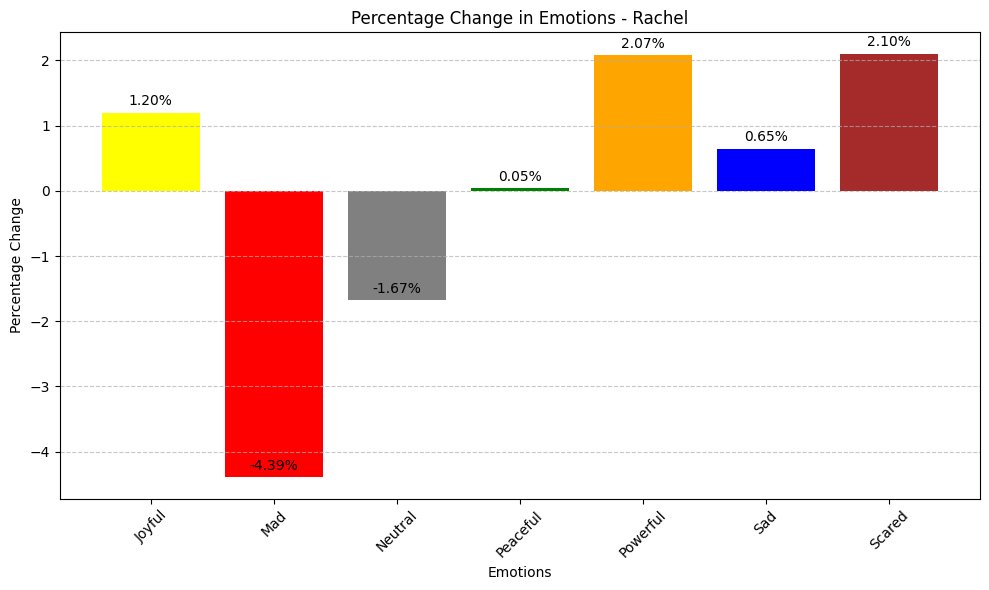

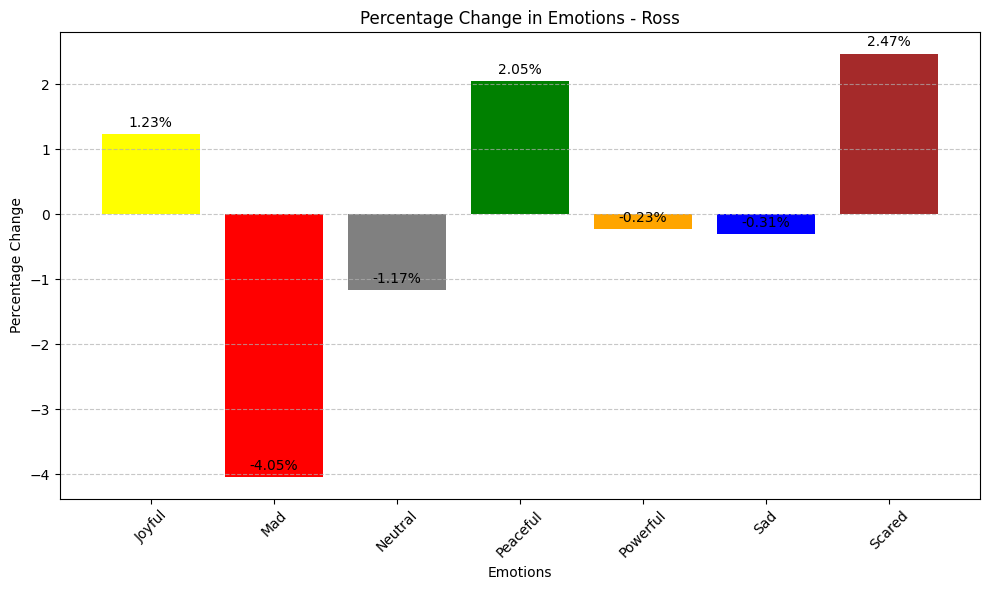

In [ ]:
plot_emotion_percentage_change(emotion_percentages_difference_rachel, 'Percentage Change in Emotions - Rachel', color_mapping_0)
plot_emotion_percentage_change(emotion_percentages_difference_ross, 'Percentage Change in Emotions - Ross', color_mapping_0)

## DF1

In [ ]:
grouped_scenes_1 = group_dataframe_by_column(df1, 'scene_id')

In [ ]:
rachel_1 = filter_dataframe_for_characters(grouped_scenes_1, 'Rachel Green', 'Ross Geller')
rachel_1
rachel_df = rachel_1[rachel_1['speakers'] == 'Rachel Green']
emotion_counts_rachel = rachel_df['max_emotion_label'].value_counts()
emotion_percentages_rachel_only = (emotion_counts_rachel/ len(rachel_df)) * 100
print("\nEmotion Percentages for Rachel:")
print(emotion_percentages_rachel_only)
ross_1 = filter_dataframe_for_characters(grouped_scenes_1,  'Ross Geller', 'Rachel Green')
ross_1
ross_df = ross_1[ross_1['speakers'] == 'Ross Geller']
emotion_counts_ross = ross_df['max_emotion_label'].value_counts()
emotion_percentages_ross_only = (emotion_counts_ross / len(ross_df)) * 100
print("\nEmotion Percentages for Ross:")
print(emotion_percentages_ross_only)

Scene IDs with Only Rachel Green Present:
['s01_e02_c07', 's01_e02_c09', 's01_e04_c04', 's01_e04_c05', 's01_e04_c07', 's01_e04_c12', 's01_e04_c14', 's01_e06_c05', 's01_e07_c03', 's01_e07_c14', 's01_e09_c01', 's01_e09_c10', 's01_e12_c10', 's01_e12_c12', 's01_e13_c01', 's01_e13_c08', 's01_e14_c05', 's01_e14_c08', 's01_e14_c10', 's01_e14_c13', 's01_e14_c16', 's01_e15_c06', 's01_e15_c10', 's01_e16_c16', 's01_e17_c03', 's01_e17_c09', 's01_e19_c02', 's01_e20_c03', 's01_e20_c05', 's01_e20_c07', 's01_e20_c11', 's01_e21_c02', 's01_e21_c04', 's01_e21_c08', 's01_e21_c11', 's01_e22_c04', 's01_e23_c10', 's01_e23_c14', 's01_e23_c17', 's01_e24_c03', 's01_e24_c06', 's01_e24_c08', 's02_e01_c06', 's02_e01_c12', 's02_e02_c04', 's02_e02_c11', 's02_e02_c13', 's02_e03_c03', 's02_e03_c06', 's02_e03_c09', 's02_e04_c01', 's02_e04_c09', 's02_e06_c02', 's02_e06_c05', 's02_e07_c01', 's02_e07_c05', 's02_e07_c07', 's02_e08_c01', 's02_e08_c05', 's02_e08_c07', 's02_e12_c09', 's02_e13_c08', 's02_e13_c11', 's02_e14_c09

In [ ]:
rachel_ross = filter_scenes_both_characters(grouped_scenes_1, 'Rachel Green', 'Ross Geller')
rachel_only_df = rachel_ross[rachel_ross['speakers'] == 'Rachel Green']
emotion_counts_rachel = rachel_only_df['max_emotion_label'].value_counts()
emotion_percentages_rachel = (emotion_counts_rachel / len(rachel_only_df)) * 100
print("\nEmotion Percentages for Rachel:")
print(emotion_percentages_rachel)
ross_only_df = rachel_ross[rachel_ross['speakers'] == 'Ross Geller']
emotion_counts_ross = ross_only_df['max_emotion_label'].value_counts()
emotion_percentages_ross = (emotion_counts_ross / len(ross_only_df)) * 100
print("\nEmotion Percentages for Ross:")
print(emotion_percentages_ross)

Scene IDs with Both Present:
['s01_e01_c13', 's01_e01_c15', 's01_e02_c01', 's01_e02_c11', 's01_e03_c01', 's01_e03_c06', 's01_e03_c09', 's01_e03_c11', 's01_e03_c14', 's01_e04_c01', 's01_e04_c16', 's01_e05_c01', 's01_e05_c12', 's01_e05_c15', 's01_e05_c16', 's01_e06_c01', 's01_e07_c05', 's01_e07_c11', 's01_e07_c12', 's01_e07_c16', 's01_e08_c02', 's01_e08_c04', 's01_e08_c09', 's01_e08_c10', 's01_e08_c12', 's01_e09_c04', 's01_e10_c01', 's01_e11_c12', 's01_e12_c02', 's01_e12_c07', 's01_e12_c08', 's01_e13_c09', 's01_e13_c12', 's01_e14_c02', 's01_e15_c01', 's01_e15_c12', 's01_e16_c13', 's01_e16_c15', 's01_e17_c04', 's01_e17_c07', 's01_e17_c11', 's01_e17_c14', 's01_e18_c05', 's01_e18_c06', 's01_e18_c08', 's01_e19_c08', 's01_e20_c01', 's01_e20_c12', 's01_e21_c01', 's01_e21_c07', 's01_e21_c09', 's01_e21_c14', 's01_e22_c01', 's01_e22_c10', 's01_e22_c12', 's01_e22_c13', 's01_e23_c01', 's01_e23_c02', 's01_e23_c20', 's01_e23_c21', 's01_e24_c01', 's01_e24_c04', 's01_e24_c11', 's02_e01_c02', 's02_e01_c

In [ ]:
emotion_percentages_difference_ross = emotion_percentages_ross_only  - emotion_percentages_ross
emotion_percentages_difference_ross = emotion_percentages_difference_ross.sort_index()
emotion_percentages_difference_ross = pd.DataFrame(emotion_percentages_difference_ross)
emotion_percentages_difference_ross.rename(columns={"max_emotion_label": "percentages"}, inplace=True)
print(emotion_percentages_difference_ross)
emotion_percentages_difference_rachel = emotion_percentages_rachel_only  - emotion_percentages_rachel
emotion_percentages_difference_rachel = emotion_percentages_difference_rachel.sort_index()
emotion_percentages_difference_rachel = pd.DataFrame(emotion_percentages_difference_rachel)
emotion_percentages_difference_rachel.rename(columns={"max_emotion_label": "percentages"}, inplace=True)
print(emotion_percentages_difference_rachel)

          percentages
anger       -0.879449
fear         1.447488
joy         -1.449229
love         0.718453
sadness      0.341145
surprise    -0.178408
          percentages
anger        2.232852
fear        -0.768763
joy         -0.394305
love        -0.021832
sadness     -0.713189
surprise    -0.334762


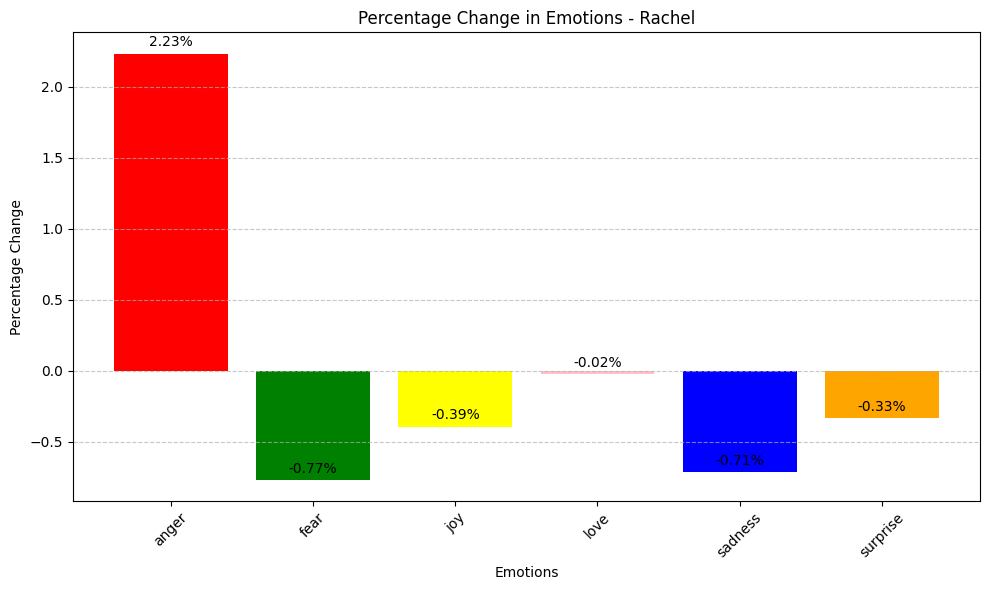

In [ ]:
plot_emotion_percentage_change(emotion_percentages_difference_rachel, 'Percentage Change in Emotions - Rachel', color_mapping_1)

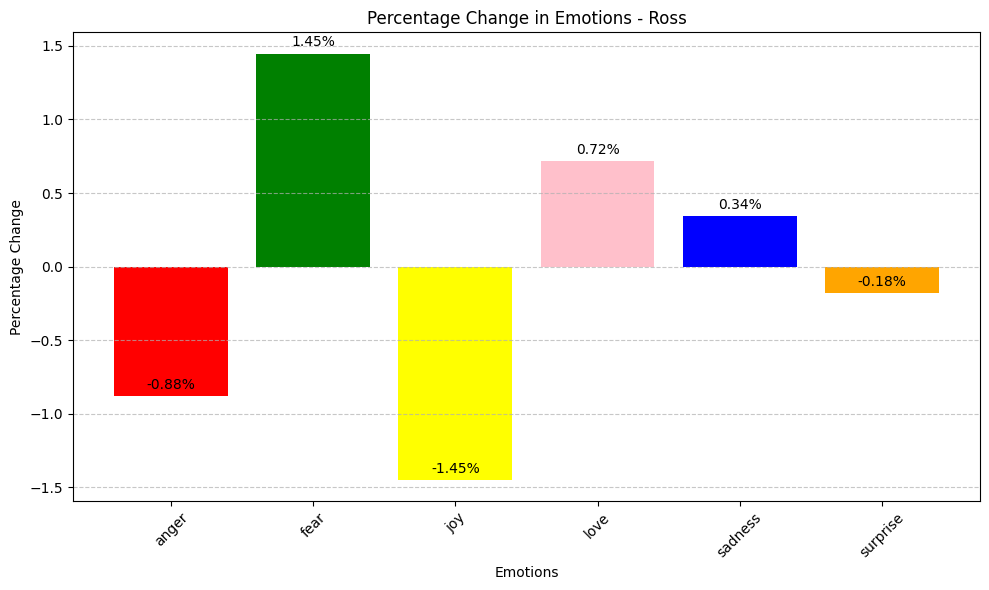

In [ ]:
plot_emotion_percentage_change(emotion_percentages_difference_ross, 'Percentage Change in Emotions - Ross', color_mapping_1)

## DF2

In [ ]:
grouped_scenes_2 = group_dataframe_by_column(df2, 'scene_id')
rachel_2 = filter_dataframe_for_characters(grouped_scenes_2, 'Rachel Green', 'Ross Geller')
rachel_2
rachel_df_2 = rachel_2[rachel_2['speakers'] == 'Rachel Green']
emotion_counts_rachel_2 = rachel_df_2['max_emotion_label'].value_counts()
emotion_percentages_rachel_only_2 = (emotion_counts_rachel_2/ len(rachel_df_2)) * 100
print("\nEmotion Percentages for Rachel:")
print(emotion_percentages_rachel_only_2)
ross_2 = filter_dataframe_for_characters(grouped_scenes_2,  'Ross Geller', 'Rachel Green')
ross_2
ross_df_2 = ross_2[ross_2['speakers'] == 'Ross Geller']
emotion_counts_ross_2 = ross_df_2['max_emotion_label'].value_counts()
emotion_percentages_ross_only_2 = (emotion_counts_ross_2 / len(ross_df_2)) * 100
print("\nEmotion Percentages for Ross:")
print(emotion_percentages_ross_only_2)

Scene IDs with Only Rachel Green Present:
['s01_e02_c07', 's01_e02_c09', 's01_e04_c04', 's01_e04_c05', 's01_e04_c07', 's01_e04_c12', 's01_e04_c14', 's01_e06_c05', 's01_e07_c03', 's01_e07_c14', 's01_e09_c01', 's01_e09_c10', 's01_e12_c10', 's01_e12_c12', 's01_e13_c01', 's01_e13_c08', 's01_e14_c05', 's01_e14_c08', 's01_e14_c10', 's01_e14_c13', 's01_e14_c16', 's01_e15_c06', 's01_e15_c10', 's01_e16_c16', 's01_e17_c03', 's01_e17_c09', 's01_e19_c02', 's01_e20_c03', 's01_e20_c05', 's01_e20_c07', 's01_e20_c11', 's01_e21_c02', 's01_e21_c04', 's01_e21_c08', 's01_e21_c11', 's01_e22_c04', 's01_e23_c10', 's01_e23_c14', 's01_e23_c17', 's01_e24_c03', 's01_e24_c06', 's01_e24_c08', 's02_e01_c06', 's02_e01_c12', 's02_e02_c04', 's02_e02_c11', 's02_e02_c13', 's02_e03_c03', 's02_e03_c06', 's02_e03_c09', 's02_e04_c01', 's02_e04_c09', 's02_e06_c02', 's02_e06_c05', 's02_e07_c01', 's02_e07_c05', 's02_e07_c07', 's02_e08_c01', 's02_e08_c05', 's02_e08_c07', 's02_e12_c09', 's02_e13_c08', 's02_e13_c11', 's02_e14_c09

In [ ]:
rachel_ross_2 = filter_scenes_both_characters(grouped_scenes_2, 'Rachel Green', 'Ross Geller')
rachel_only_df_2 = rachel_ross_2[rachel_ross_2['speakers'] == 'Rachel Green']
emotion_counts_rachel_2 = rachel_only_df_2['max_emotion_label'].value_counts()
emotion_percentages_rachel_2 = (emotion_counts_rachel_2 / len(rachel_only_df_2)) * 100
print("\nEmotion Percentages for Rachel:")
print(emotion_percentages_rachel_2)
ross_only_df_2 = rachel_ross_2[rachel_ross_2['speakers'] == 'Ross Geller']
emotion_counts_ross_2 = ross_only_df_2['max_emotion_label'].value_counts()
emotion_percentages_ross_2 = (emotion_counts_ross_2 / len(ross_only_df_2)) * 100
print("\nEmotion Percentages for Ross:")
print(emotion_percentages_ross_2)

Scene IDs with Both Present:
['s01_e01_c13', 's01_e01_c15', 's01_e02_c01', 's01_e02_c11', 's01_e03_c01', 's01_e03_c06', 's01_e03_c09', 's01_e03_c11', 's01_e03_c14', 's01_e04_c01', 's01_e04_c16', 's01_e05_c01', 's01_e05_c12', 's01_e05_c15', 's01_e05_c16', 's01_e06_c01', 's01_e07_c05', 's01_e07_c11', 's01_e07_c12', 's01_e07_c16', 's01_e08_c02', 's01_e08_c04', 's01_e08_c09', 's01_e08_c10', 's01_e08_c12', 's01_e09_c04', 's01_e10_c01', 's01_e11_c12', 's01_e12_c02', 's01_e12_c07', 's01_e12_c08', 's01_e13_c09', 's01_e13_c12', 's01_e14_c02', 's01_e15_c01', 's01_e15_c12', 's01_e16_c13', 's01_e16_c15', 's01_e17_c04', 's01_e17_c07', 's01_e17_c11', 's01_e17_c14', 's01_e18_c05', 's01_e18_c06', 's01_e18_c08', 's01_e19_c08', 's01_e20_c01', 's01_e20_c12', 's01_e21_c01', 's01_e21_c07', 's01_e21_c09', 's01_e21_c14', 's01_e22_c01', 's01_e22_c10', 's01_e22_c12', 's01_e22_c13', 's01_e23_c01', 's01_e23_c02', 's01_e23_c20', 's01_e23_c21', 's01_e24_c01', 's01_e24_c04', 's01_e24_c11', 's02_e01_c02', 's02_e01_c

In [ ]:
emotion_percentages_difference_rachel_2 = emotion_percentages_rachel_only_2  - emotion_percentages_rachel_2
emotion_percentages_difference_rachel_2 = emotion_percentages_difference_rachel_2.sort_index()
emotion_percentages_difference_rachel_2 = pd.DataFrame(emotion_percentages_difference_rachel_2)
emotion_percentages_difference_rachel_2.rename(columns={"max_emotion_label": "percentages"}, inplace=True)
print(emotion_percentages_difference_rachel_2)
emotion_percentages_difference_ross_2 = emotion_percentages_ross_only_2  - emotion_percentages_ross_2
emotion_percentages_difference_ross_2 = emotion_percentages_difference_ross_2.sort_index()
emotion_percentages_difference_ross_2 = pd.DataFrame(emotion_percentages_difference_ross_2)
emotion_percentages_difference_ross_2.rename(columns={"max_emotion_label": "percentages"}, inplace=True)
print(emotion_percentages_difference_ross_2)

          percentages
anger       -1.867656
disgust      0.710543
fear         0.402906
joy          1.529586
neutral     -1.679104
sadness     -0.434000
surprise     1.337726
          percentages
anger        0.195418
disgust     -1.090940
fear         0.913202
joy          1.967040
neutral     -3.951492
sadness     -0.540983
surprise     2.507755


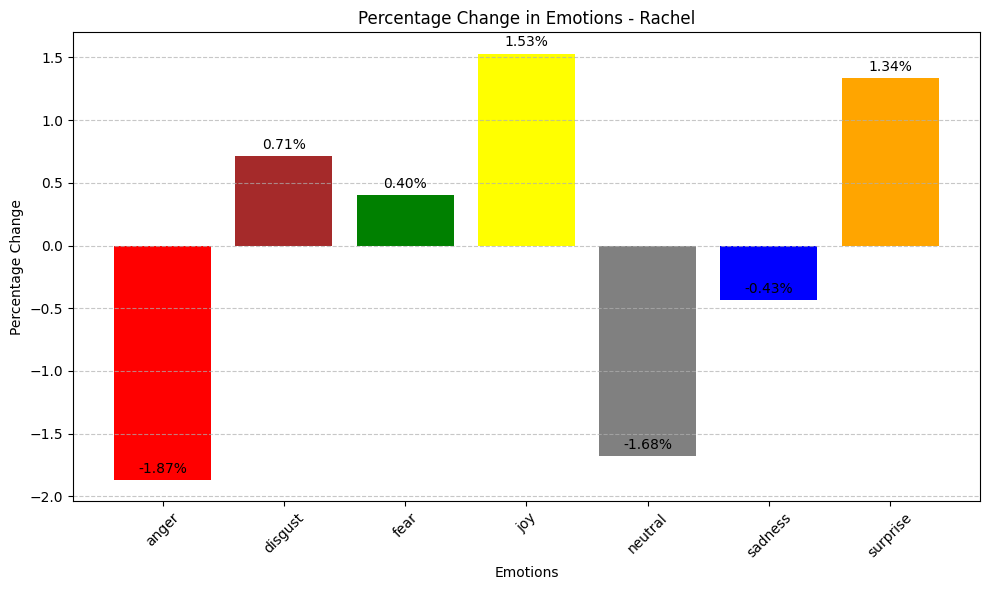

In [ ]:
plot_emotion_percentage_change(emotion_percentages_difference_rachel_2, 'Percentage Change in Emotions - Rachel', color_mapping_2)

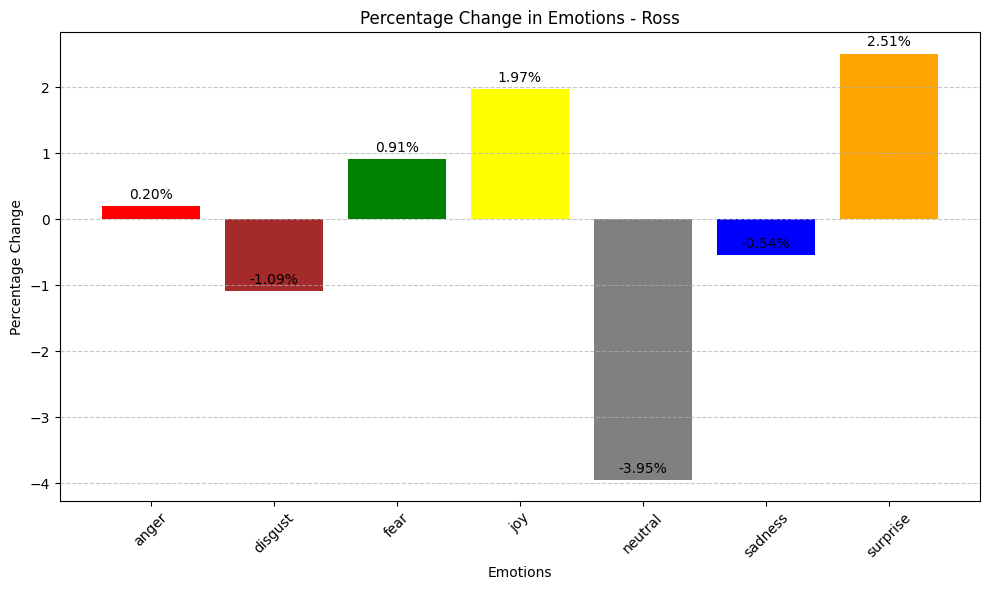

In [ ]:
plot_emotion_percentage_change(emotion_percentages_difference_ross_2, 'Percentage Change in Emotions - Ross', color_mapping_2)

# 4) MODELS' PERFORMANCE

In [ ]:
y_true = df['emotion'].tolist()
print(y_true)
print(len(y_true))
replacement_map = {'Mad': 'anger', 'Joyful': 'joy', 'Sad': 'sadness', 'Scared': 'fear', 'Neutral': 'neutral'}
for i in range(len(y_true)):
    if y_true[i] in replacement_map:
        y_true[i] = replacement_map[y_true[i]]
print(y_true)

['Joyful', 'Neutral', 'Joyful', 'Powerful', 'Powerful', 'Joyful', 'Neutral', 'Mad', 'Sad', 'Joyful', 'Scared', 'Sad', 'Scared', 'Mad', 'Neutral', 'Mad', 'Scared', 'Joyful', 'Scared', 'Neutral', 'Neutral', 'Scared', 'Joyful', 'Joyful', 'Neutral', 'Peaceful', 'Mad', 'Scared', 'Neutral', 'Scared', 'Neutral', 'Neutral', 'Neutral', 'Mad', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Joyful', 'Scared', 'Neutral', 'Neutral', 'Scared', 'Neutral', 'Scared', 'Peaceful', 'Sad', 'Neutral', 'Neutral', 'Neutral', 'Sad', 'Neutral', 'Scared', 'Mad', 'Scared', 'Powerful', 'Mad', 'Powerful', 'Mad', 'Neutral', 'Scared', 'Neutral', 'Powerful', 'Powerful', 'Neutral', 'Scared', 'Joyful', 'Scared', 'Scared', 'Mad', 'Neutral', 'Neutral', 'Scared', 'Mad', 'Scared', 'Mad', 'Mad', 'Mad', 'Peaceful', 'Mad', 'Neutral', 'Scared', 'Joyful', 'Scared', 'Sad', 'Sad', 'Sad', 'Scared', 'Mad', 'Mad', 'Powerful', 'Powerful', 'Powerful', 'Mad', 'Neutral', 'Mad', 'Powerf

In [ ]:
y_pred_1= df1['max_emotion_label'].tolist()
print(y_pred_1)
y_pred_2= df2['max_emotion_label'].tolist()
print(y_pred_2)

['joy', 'joy', 'joy', 'love', 'joy', 'anger', 'joy', 'anger', 'sadness', 'anger', 'anger', 'anger', 'anger', 'anger', 'joy', 'anger', 'anger', 'joy', 'joy', 'anger', 'anger', 'joy', 'joy', 'joy', 'anger', 'joy', 'fear', 'anger', 'fear', 'fear', 'anger', 'anger', 'joy', 'sadness', 'anger', 'joy', 'anger', 'joy', 'anger', 'joy', 'love', 'joy', 'joy', 'anger', 'fear', 'anger', 'anger', 'joy', 'joy', 'anger', 'joy', 'joy', 'joy', 'anger', 'joy', 'anger', 'joy', 'joy', 'joy', 'joy', 'anger', 'anger', 'anger', 'anger', 'anger', 'joy', 'anger', 'joy', 'joy', 'sadness', 'joy', 'joy', 'joy', 'fear', 'anger', 'sadness', 'anger', 'anger', 'anger', 'joy', 'joy', 'joy', 'anger', 'joy', 'joy', 'sadness', 'surprise', 'joy', 'anger', 'anger', 'joy', 'joy', 'joy', 'anger', 'fear', 'joy', 'joy', 'anger', 'anger', 'anger', 'anger', 'joy', 'surprise', 'joy', 'joy', 'joy', 'anger', 'anger', 'anger', 'joy', 'fear', 'joy', 'joy', 'anger', 'fear', 'joy', 'joy', 'joy', 'fear', 'anger', 'joy', 'joy', 'joy', 'an

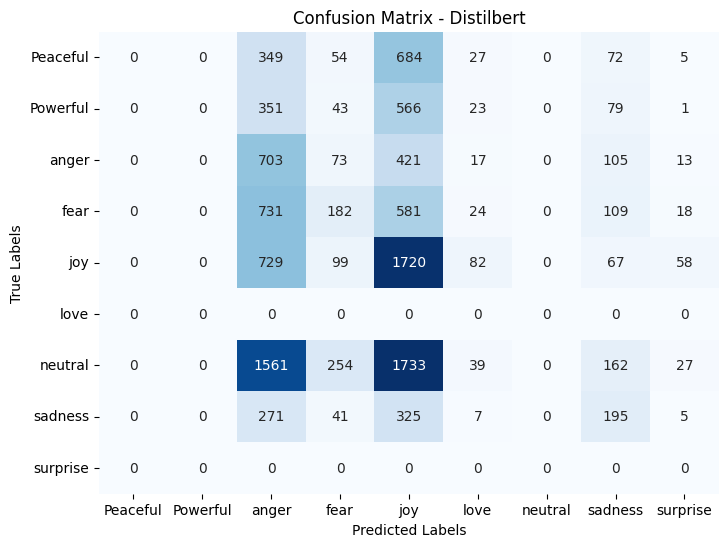

In [ ]:
all_labels = np.unique(y_true + y_pred_1)
cm = confusion_matrix(y_true, y_pred_1, labels=all_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Distilbert')
plt.show()

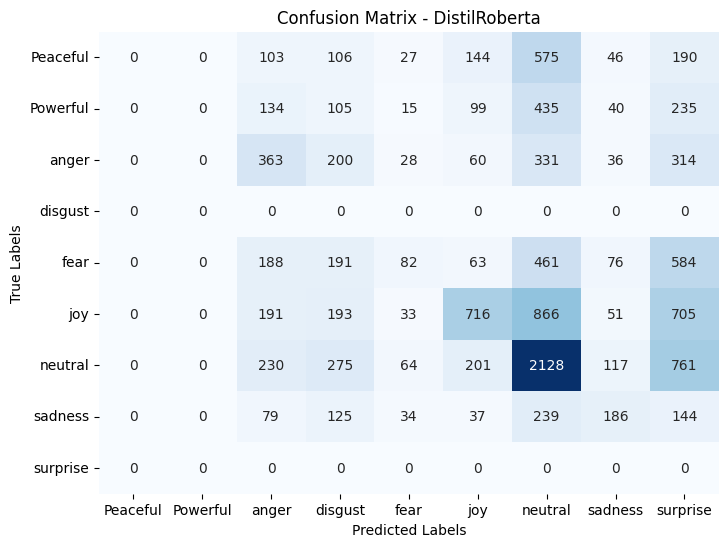

In [ ]:
all_labels = np.unique(y_true + y_pred_2)
cm = confusion_matrix(y_true, y_pred_2, labels=all_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - DistilRoberta')
plt.show()

In [ ]:
report = classification_report(y_true, y_pred_1)
print(report)

              precision    recall  f1-score   support

    Peaceful       0.00      0.00      0.00      1191
    Powerful       0.00      0.00      0.00      1063
       anger       0.15      0.53      0.23      1332
        fear       0.24      0.11      0.15      1645
         joy       0.29      0.62      0.39      2755
        love       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00      3776
     sadness       0.25      0.23      0.24       844
    surprise       0.00      0.00      0.00         0

    accuracy                           0.22     12606
   macro avg       0.10      0.17      0.11     12606
weighted avg       0.13      0.22      0.15     12606



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
report = classification_report(y_true, y_pred_2)
print(report)

              precision    recall  f1-score   support

    Peaceful       0.00      0.00      0.00      1191
    Powerful       0.00      0.00      0.00      1063
       anger       0.28      0.27      0.28      1332
     disgust       0.00      0.00      0.00         0
        fear       0.29      0.05      0.09      1645
         joy       0.54      0.26      0.35      2755
     neutral       0.42      0.56      0.48      3776
     sadness       0.34      0.22      0.27       844
    surprise       0.00      0.00      0.00         0

    accuracy                           0.28     12606
   macro avg       0.21      0.15      0.16     12606
weighted avg       0.34      0.28      0.28     12606



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.